In [1]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
import math
from datetime import date
from scipy.stats import ttest_ind


In [248]:
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

# from sklearn import linear_model #why one way over another?
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
seasonal=pd.read_csv('seasonal.csv',index_col=0)

In [4]:
seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2001-01 to 2021-12
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rural Interstate      252 non-null    float64
 1   Rural Other Arterial  252 non-null    float64
 2   Other Rural           252 non-null    float64
 3   Urban Interstate      252 non-null    float64
 4   Urban Other Arterial  252 non-null    float64
 5   Other Urban           252 non-null    float64
 6   All Systems           252 non-null    float64
dtypes: float64(7)
memory usage: 15.8+ KB


In [5]:
fatalities=pd.read_csv('fatalities_df_final.csv',index_col=0)

In [6]:
fatalities

state  rural_interstate  urban_interstate  freeway_expressway  \
0           Alabama              76.0              54.0                 1.0   
1            Alaska              20.0               2.0                 2.0   
2           Arizona             167.0              34.0                13.0   
3          Arkansas              60.0              15.0                 9.0   
4        California             218.0             248.0               308.0   
...             ...               ...               ...                 ...   
1191       Virginia              65.0              73.0                14.0   
1192     Washington              17.0              42.0                50.0   
1193  West Virginia              10.0              17.0                 0.0   
1194      Wisconsin              24.0              16.0                11.0   
1195        Wyoming              23.0               5.0                 0.0   

      other_arterial  minor_arterial  collector_arterial  local  unknown  \
0              285.0           213.0               276.0  159.0      7.0   
1               10.0            12.0                15.0    8.0      1.0   
2              285.0           188.0               196.0   88.0      9.0   
3              167.0           118.0               137.0  115.0      4.0   
4             1042.0           747.0               543.0  388.0      0.0   
...              ...             ...                 ...    ...      ...   
1191           239.0           196.0               179.0   83.0      1.0   
1192            95.0            61.0               118.0  170.0      7.0   
1193            61.0            53.0                82.0   37.0      7.0   
1194           178.0           133.0               141.0  107.0      4.0   
1195            45.0             9.0                37.0    7.0      1.0   

       total  year  
0     1071.0  1998  
1       70.0  1998  
2      980.0  1998  
3      625.0  1998  
4     3494.0  1998  
...      ...   ...  
1191   850.0  2020  
1192   560.0  2020  
1193   267.0  2020  
1194   614.0  2020  
1195   127.0  2020  

[1196 rows x 11 columns]

In [7]:
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               1196 non-null   object 
 1   rural_interstate    1196 non-null   float64
 2   urban_interstate    1196 non-null   float64
 3   freeway_expressway  1196 non-null   float64
 4   other_arterial      1196 non-null   float64
 5   minor_arterial      1196 non-null   float64
 6   collector_arterial  1196 non-null   float64
 7   local               1196 non-null   float64
 8   unknown             1196 non-null   float64
 9   total               1196 non-null   float64
 10  year                1196 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 112.1+ KB


In [8]:
fatalities['year']=fatalities.year.astype({'year': 'object'})

In [9]:
fatalities['year']=fatalities['year'].astype('str')+"-12-31"

In [10]:
fatalities['year']=fatalities.year.astype({'year': 'datetime64[ns]'})

In [11]:
fatalities

state  rural_interstate  urban_interstate  freeway_expressway  \
0           Alabama              76.0              54.0                 1.0   
1            Alaska              20.0               2.0                 2.0   
2           Arizona             167.0              34.0                13.0   
3          Arkansas              60.0              15.0                 9.0   
4        California             218.0             248.0               308.0   
...             ...               ...               ...                 ...   
1191       Virginia              65.0              73.0                14.0   
1192     Washington              17.0              42.0                50.0   
1193  West Virginia              10.0              17.0                 0.0   
1194      Wisconsin              24.0              16.0                11.0   
1195        Wyoming              23.0               5.0                 0.0   

      other_arterial  minor_arterial  collector_arterial  local  unknown  \
0              285.0           213.0               276.0  159.0      7.0   
1               10.0            12.0                15.0    8.0      1.0   
2              285.0           188.0               196.0   88.0      9.0   
3              167.0           118.0               137.0  115.0      4.0   
4             1042.0           747.0               543.0  388.0      0.0   
...              ...             ...                 ...    ...      ...   
1191           239.0           196.0               179.0   83.0      1.0   
1192            95.0            61.0               118.0  170.0      7.0   
1193            61.0            53.0                82.0   37.0      7.0   
1194           178.0           133.0               141.0  107.0      4.0   
1195            45.0             9.0                37.0    7.0      1.0   

       total       year  
0     1071.0 1998-12-31  
1       70.0 1998-12-31  
2      980.0 1998-12-31  
3      625.0 1998-12-31  
4     3494.0 1998-12-31  
...      ...        ...  
1191   850.0 2020-12-31  
1192   560.0 2020-12-31  
1193   267.0 2020-12-31  
1194   614.0 2020-12-31  
1195   127.0 2020-12-31  

[1196 rows x 11 columns]

In [12]:
seasonal

Rural Interstate  Rural Other Arterial  Other Rural  \
2001-01         19.426042             30.739645    29.494584   
2001-02         18.586970             29.579354    28.190880   
2001-03         22.181398             34.728551    33.219088   
2001-04         22.698817             35.135015    33.574669   
2001-05         23.852469             37.626077    36.292352   
...                   ...                   ...          ...   
2021-08         24.500000             35.400000    31.800000   
2021-09         22.900000             33.900000    30.500000   
2021-10         23.700000             34.700000    31.000000   
2021-11         22.700000             32.100000    28.400000   
2021-12         22.400000             31.700000    27.800000   

         Urban Interstate  Urban Other Arterial  Other Urban  All Systems  
2001-01         30.700441             71.048965    27.848687   209.258364  
2001-02         29.303498             67.545708    26.702532   199.908942  
2001-03         33.385817             77.556806    30.416563   231.488223  
2001-04         33.486493             75.996995    30.472769   231.364758  
2001-05         35.192281             79.525488    31.765014   244.253681  
...                   ...                   ...          ...          ...  
2021-08         48.800000             99.700000    47.200000   287.400000  
2021-09         47.800000             96.300000    46.500000   278.000000  
2021-10         49.500000             99.300000    47.600000   285.800000  
2021-11         46.900000             92.900000    44.500000   267.600000  
2021-12         46.800000             93.800000    45.900000   268.400000  

[252 rows x 7 columns]

In [13]:
seasonal[['12_month_interstate','12_month_arterial','12_month_other','12_month_all']]=math.nan

In [14]:
seasonal['interstate']=seasonal['Rural Interstate']+seasonal['Urban Interstate']

In [15]:
seasonal['arterial']=seasonal['Rural Other Arterial']+seasonal['Urban Other Arterial']

In [16]:
seasonal

Rural Interstate  Rural Other Arterial  Other Rural  \
2001-01         19.426042             30.739645    29.494584   
2001-02         18.586970             29.579354    28.190880   
2001-03         22.181398             34.728551    33.219088   
2001-04         22.698817             35.135015    33.574669   
2001-05         23.852469             37.626077    36.292352   
...                   ...                   ...          ...   
2021-08         24.500000             35.400000    31.800000   
2021-09         22.900000             33.900000    30.500000   
2021-10         23.700000             34.700000    31.000000   
2021-11         22.700000             32.100000    28.400000   
2021-12         22.400000             31.700000    27.800000   

         Urban Interstate  Urban Other Arterial  Other Urban  All Systems  \
2001-01         30.700441             71.048965    27.848687   209.258364   
2001-02         29.303498             67.545708    26.702532   199.908942   
2001-03         33.385817             77.556806    30.416563   231.488223   
2001-04         33.486493             75.996995    30.472769   231.364758   
2001-05         35.192281             79.525488    31.765014   244.253681   
...                   ...                   ...          ...          ...   
2021-08         48.800000             99.700000    47.200000   287.400000   
2021-09         47.800000             96.300000    46.500000   278.000000   
2021-10         49.500000             99.300000    47.600000   285.800000   
2021-11         46.900000             92.900000    44.500000   267.600000   
2021-12         46.800000             93.800000    45.900000   268.400000   

         12_month_interstate  12_month_arterial  12_month_other  12_month_all  \
2001-01                  NaN                NaN             NaN           NaN   
2001-02                  NaN                NaN             NaN           NaN   
2001-03                  NaN                NaN             NaN           NaN   
2001-04                  NaN                NaN             NaN           NaN   
2001-05                  NaN                NaN             NaN           NaN   
...                      ...                ...             ...           ...   
2021-08                  NaN                NaN             NaN           NaN   
2021-09                  NaN                NaN             NaN           NaN   
2021-10                  NaN                NaN             NaN           NaN   
2021-11                  NaN                NaN             NaN           NaN   
2021-12                  NaN                NaN             NaN           NaN   

         interstate    arterial  
2001-01   50.126483  101.788610  
2001-02   47.890468   97.125062  
2001-03   55.567215  112.285357  
2001-04   56.185310  111.132010  
2001-05   59.044750  117.151565  
...             ...         ...  
2021-08   73.300000  135.100000  
2021-09   70.700000  130.200000  
2021-10   73.200000  134.000000  
2021-11   69.600000  125.000000  
2021-12   69.200000  125.500000  

[252 rows x 13 columns]

In [17]:
seasonal['other']=seasonal['Other Rural']+seasonal['Other Urban']

In [18]:
seasonal

Rural Interstate  Rural Other Arterial  Other Rural  \
2001-01         19.426042             30.739645    29.494584   
2001-02         18.586970             29.579354    28.190880   
2001-03         22.181398             34.728551    33.219088   
2001-04         22.698817             35.135015    33.574669   
2001-05         23.852469             37.626077    36.292352   
...                   ...                   ...          ...   
2021-08         24.500000             35.400000    31.800000   
2021-09         22.900000             33.900000    30.500000   
2021-10         23.700000             34.700000    31.000000   
2021-11         22.700000             32.100000    28.400000   
2021-12         22.400000             31.700000    27.800000   

         Urban Interstate  Urban Other Arterial  Other Urban  All Systems  \
2001-01         30.700441             71.048965    27.848687   209.258364   
2001-02         29.303498             67.545708    26.702532   199.908942   
2001-03         33.385817             77.556806    30.416563   231.488223   
2001-04         33.486493             75.996995    30.472769   231.364758   
2001-05         35.192281             79.525488    31.765014   244.253681   
...                   ...                   ...          ...          ...   
2021-08         48.800000             99.700000    47.200000   287.400000   
2021-09         47.800000             96.300000    46.500000   278.000000   
2021-10         49.500000             99.300000    47.600000   285.800000   
2021-11         46.900000             92.900000    44.500000   267.600000   
2021-12         46.800000             93.800000    45.900000   268.400000   

         12_month_interstate  12_month_arterial  12_month_other  12_month_all  \
2001-01                  NaN                NaN             NaN           NaN   
2001-02                  NaN                NaN             NaN           NaN   
2001-03                  NaN                NaN             NaN           NaN   
2001-04                  NaN                NaN             NaN           NaN   
2001-05                  NaN                NaN             NaN           NaN   
...                      ...                ...             ...           ...   
2021-08                  NaN                NaN             NaN           NaN   
2021-09                  NaN                NaN             NaN           NaN   
2021-10                  NaN                NaN             NaN           NaN   
2021-11                  NaN                NaN             NaN           NaN   
2021-12                  NaN                NaN             NaN           NaN   

         interstate    arterial      other  
2001-01   50.126483  101.788610  57.343271  
2001-02   47.890468   97.125062  54.893412  
2001-03   55.567215  112.285357  63.635651  
2001-04   56.185310  111.132010  64.047438  
2001-05   59.044750  117.151565  68.057366  
...             ...         ...        ...  
2021-08   73.300000  135.100000  79.000000  
2021-09   70.700000  130.200000  77.000000  
2021-10   73.200000  134.000000  78.600000  
2021-11   69.600000  125.000000  72.900000  
2021-12   69.200000  125.500000  73.700000  

[252 rows x 14 columns]

In [19]:
seasonal[['12_month_interstate','12_month_arterial','12_month_other']]=math.nan

In [20]:
seasonal

Rural Interstate  Rural Other Arterial  Other Rural  \
2001-01         19.426042             30.739645    29.494584   
2001-02         18.586970             29.579354    28.190880   
2001-03         22.181398             34.728551    33.219088   
2001-04         22.698817             35.135015    33.574669   
2001-05         23.852469             37.626077    36.292352   
...                   ...                   ...          ...   
2021-08         24.500000             35.400000    31.800000   
2021-09         22.900000             33.900000    30.500000   
2021-10         23.700000             34.700000    31.000000   
2021-11         22.700000             32.100000    28.400000   
2021-12         22.400000             31.700000    27.800000   

         Urban Interstate  Urban Other Arterial  Other Urban  All Systems  \
2001-01         30.700441             71.048965    27.848687   209.258364   
2001-02         29.303498             67.545708    26.702532   199.908942   
2001-03         33.385817             77.556806    30.416563   231.488223   
2001-04         33.486493             75.996995    30.472769   231.364758   
2001-05         35.192281             79.525488    31.765014   244.253681   
...                   ...                   ...          ...          ...   
2021-08         48.800000             99.700000    47.200000   287.400000   
2021-09         47.800000             96.300000    46.500000   278.000000   
2021-10         49.500000             99.300000    47.600000   285.800000   
2021-11         46.900000             92.900000    44.500000   267.600000   
2021-12         46.800000             93.800000    45.900000   268.400000   

         12_month_interstate  12_month_arterial  12_month_other  12_month_all  \
2001-01                  NaN                NaN             NaN           NaN   
2001-02                  NaN                NaN             NaN           NaN   
2001-03                  NaN                NaN             NaN           NaN   
2001-04                  NaN                NaN             NaN           NaN   
2001-05                  NaN                NaN             NaN           NaN   
...                      ...                ...             ...           ...   
2021-08                  NaN                NaN             NaN           NaN   
2021-09                  NaN                NaN             NaN           NaN   
2021-10                  NaN                NaN             NaN           NaN   
2021-11                  NaN                NaN             NaN           NaN   
2021-12                  NaN                NaN             NaN           NaN   

         interstate    arterial      other  
2001-01   50.126483  101.788610  57.343271  
2001-02   47.890468   97.125062  54.893412  
2001-03   55.567215  112.285357  63.635651  
2001-04   56.185310  111.132010  64.047438  
2001-05   59.044750  117.151565  68.057366  
...             ...         ...        ...  
2021-08   73.300000  135.100000  79.000000  
2021-09   70.700000  130.200000  77.000000  
2021-10   73.200000  134.000000  78.600000  
2021-11   69.600000  125.000000  72.900000  
2021-12   69.200000  125.500000  73.700000  

[252 rows x 14 columns]

In [21]:
seasonal['12_month_interstate'][0]=12*seasonal['interstate'][0]

In [22]:
def populate(column):
    x=0
    seasonal[f'12_month_{column}'][0]=12*seasonal[column][0]
    x=x+seasonal[column][1]
    seasonal[f'12_month_{column}'][1]=11*seasonal[column][0]+x
    x=x+seasonal[column][2]
    seasonal[f'12_month_{column}'][2]=10*seasonal[column][0]+x
    x=x+seasonal[column][3]
    seasonal[f'12_month_{column}'][3]=9*seasonal[column][0]+x
    x=x+seasonal[column][4]
    seasonal[f'12_month_{column}'][4]=8*seasonal[column][0]+x
    x=x+seasonal[column][5]
    seasonal[f'12_month_{column}'][5]=7*seasonal[column][0]+x
    x=x+seasonal[column][6]
    seasonal[f'12_month_{column}'][6]=6*seasonal[column][0]+x
    x=x+seasonal[column][7]
    seasonal[f'12_month_{column}'][7]=5*seasonal[column][0]+x
    x=x+seasonal[column][8]
    seasonal[f'12_month_{column}'][8]=4*seasonal[column][0]+x
    x=x+seasonal[column][9]
    seasonal[f'12_month_{column}'][9]=3*seasonal[column][0]+x
    x=x+seasonal[column][10]
    seasonal[f'12_month_{column}'][10]=2*seasonal[column][0]+x
    x=x+seasonal[column][11]
    seasonal[f'12_month_{column}'][11]=1*seasonal[column][0]+x
    for index in range(12,252):
        seasonal[f'12_month_{column}'][index]=seasonal[f'12_month_{column}'][index-1]+seasonal[f'{column}'][index]-seasonal[f'{column}'][index-12]
    


In [23]:
populate('other')

In [24]:
for index in range(12,252):
    seasonal['12_month_other'][index]=seasonal['12_month_other'][index-1]+seasonal['other'][index]-seasonal['other'][index-12]

In [25]:
seasonal.rename(columns={'All Systems':'all'}, inplace=True)

In [26]:
seasonal.all=math.nan

In [27]:
populate('interstate')

In [28]:
populate('arterial')

In [29]:
seasonal.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [30]:
populate('all')

In [31]:
seasonal['all']-seasonal['interstate']-seasonal['arterial']-seasonal['other']

2001-01    0.000000e+00
2001-02    0.000000e+00
2001-03    0.000000e+00
2001-04   -2.842171e-14
2001-05    0.000000e+00
               ...     
2021-08   -2.842171e-14
2021-09    1.000000e-01
2021-10    2.842171e-14
2021-11    1.000000e-01
2021-12   -1.421085e-14
Length: 252, dtype: float64

In [32]:
eda_final=seasonal[['12_month_interstate', '12_month_arterial',
       '12_month_other', 'interstate', 'arterial', 'other','all','12_month_all']]

<AxesSubplot:>

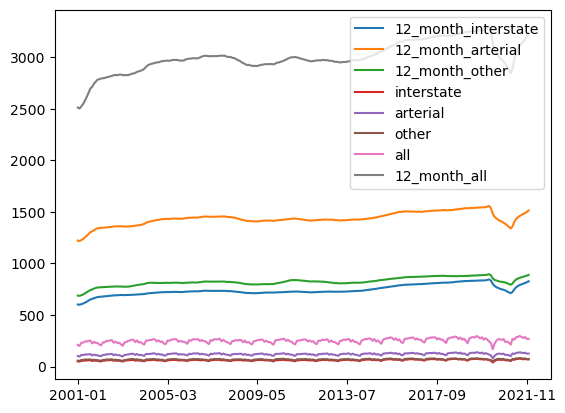

In [33]:
eda_final.plot.line()

In [34]:
fatalities

state  rural_interstate  urban_interstate  freeway_expressway  \
0           Alabama              76.0              54.0                 1.0   
1            Alaska              20.0               2.0                 2.0   
2           Arizona             167.0              34.0                13.0   
3          Arkansas              60.0              15.0                 9.0   
4        California             218.0             248.0               308.0   
...             ...               ...               ...                 ...   
1191       Virginia              65.0              73.0                14.0   
1192     Washington              17.0              42.0                50.0   
1193  West Virginia              10.0              17.0                 0.0   
1194      Wisconsin              24.0              16.0                11.0   
1195        Wyoming              23.0               5.0                 0.0   

      other_arterial  minor_arterial  collector_arterial  local  unknown  \
0              285.0           213.0               276.0  159.0      7.0   
1               10.0            12.0                15.0    8.0      1.0   
2              285.0           188.0               196.0   88.0      9.0   
3              167.0           118.0               137.0  115.0      4.0   
4             1042.0           747.0               543.0  388.0      0.0   
...              ...             ...                 ...    ...      ...   
1191           239.0           196.0               179.0   83.0      1.0   
1192            95.0            61.0               118.0  170.0      7.0   
1193            61.0            53.0                82.0   37.0      7.0   
1194           178.0           133.0               141.0  107.0      4.0   
1195            45.0             9.0                37.0    7.0      1.0   

       total       year  
0     1071.0 1998-12-31  
1       70.0 1998-12-31  
2      980.0 1998-12-31  
3      625.0 1998-12-31  
4     3494.0 1998-12-31  
...      ...        ...  
1191   850.0 2020-12-31  
1192   560.0 2020-12-31  
1193   267.0 2020-12-31  
1194   614.0 2020-12-31  
1195   127.0 2020-12-31  

[1196 rows x 11 columns]

<AxesSubplot:>

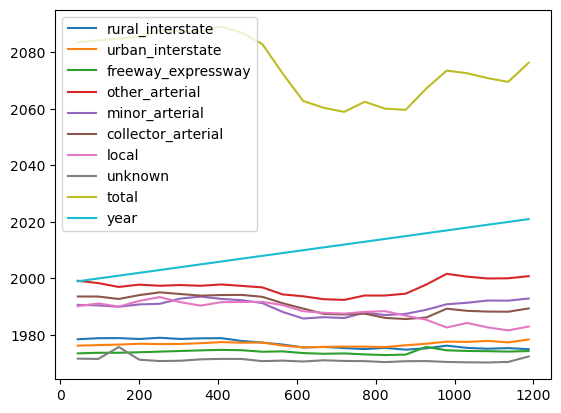

In [35]:
fatalities[fatalities['state']=='USA'].plot.line()

In [36]:
fatalities['interstate']=fatalities['rural_interstate']+fatalities['urban_interstate']

In [37]:
fatalities['arterial']=fatalities['freeway_expressway']+fatalities['other_arterial']

In [38]:
fatalities['other']=fatalities['other_arterial']	+fatalities['minor_arterial']	+fatalities['collector_arterial']	+fatalities['local']

In [39]:
final_fatal=fatalities[['state','year','interstate','arterial','other','total']]

<AxesSubplot:>

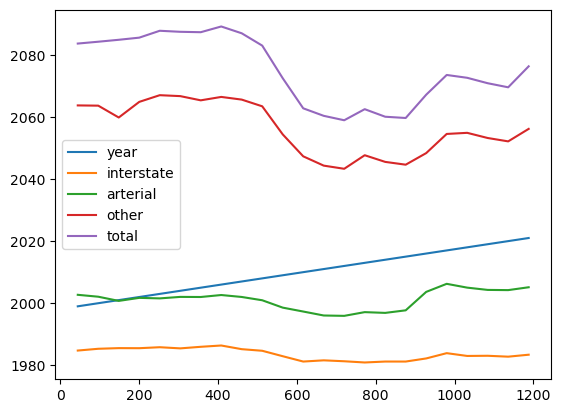

In [40]:
final_fatal[final_fatal['state']=='USA'].plot.line()

In [41]:
final_fatal.set_index('year',inplace=True)

In [42]:
final_fatal

state  interstate  arterial   other   total
year                                                           
1998-12-31        Alabama       130.0     286.0   933.0  1071.0
1998-12-31         Alaska        22.0      12.0    45.0    70.0
1998-12-31        Arizona       201.0     298.0   757.0   980.0
1998-12-31       Arkansas        75.0     176.0   537.0   625.0
1998-12-31     California       466.0    1350.0  2720.0  3494.0
...                   ...         ...       ...     ...     ...
2020-12-31       Virginia       138.0     253.0   697.0   850.0
2020-12-31     Washington        59.0     145.0   444.0   560.0
2020-12-31  West Virginia        27.0      61.0   233.0   267.0
2020-12-31      Wisconsin        40.0     189.0   559.0   614.0
2020-12-31        Wyoming        28.0      45.0    98.0   127.0

[1196 rows x 5 columns]

<AxesSubplot:xlabel='year'>

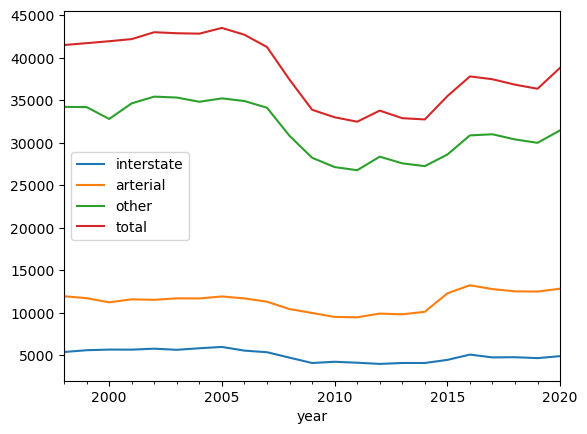

In [43]:
final_fatal[final_fatal['state']=='USA'].plot.line()


In [44]:
eda_final.columns

Index(['12_month_interstate', '12_month_arterial', '12_month_other',
       'interstate', 'arterial', 'other', 'all', '12_month_all'],
      dtype='object')

In [45]:
travel=eda_final[['interstate','arterial','other','all']]

In [46]:
travel

interstate    arterial      other         all
2001-01   50.126483  101.788610  57.343271  209.258364
2001-02   47.890468   97.125062  54.893412  199.908942
2001-03   55.567215  112.285357  63.635651  231.488223
2001-04   56.185310  111.132010  64.047438  231.364758
2001-05   59.044750  117.151565  68.057366  244.253681
...             ...         ...        ...         ...
2021-08   73.300000  135.100000  79.000000  287.400000
2021-09   70.700000  130.200000  77.000000  278.000000
2021-10   73.200000  134.000000  78.600000  285.800000
2021-11   69.600000  125.000000  72.900000  267.600000
2021-12   69.200000  125.500000  73.700000  268.400000

[252 rows x 4 columns]

<AxesSubplot:>

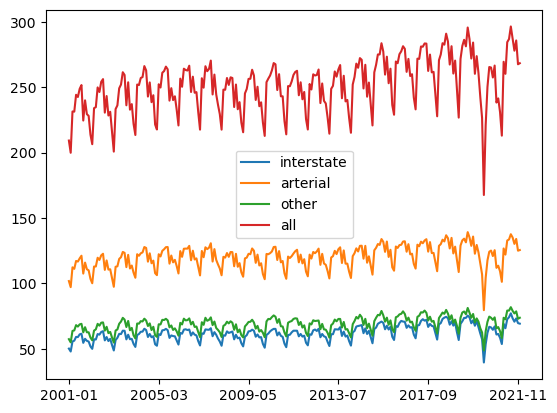

In [47]:
travel.plot.line()

In [48]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2001-01 to 2021-12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   interstate  252 non-null    float64
 1   arterial    252 non-null    float64
 2   other       252 non-null    float64
 3   all         252 non-null    float64
dtypes: float64(4)
memory usage: 17.9+ KB


In [49]:
travel.index=pd.to_datetime(travel.index)

In [50]:
travel.resample('Y',label='right').sum()

interstate     arterial       other          all
2001-12-31  673.914001  1340.670990  766.877009  2781.462000
2002-12-31  693.130184  1360.241176  775.964694  2829.336054
2003-12-31  699.562525  1372.741014  795.805122  2868.108661
2004-12-31  721.300000  1429.900000  811.100000  2962.400000
2005-12-31  722.900000  1434.000000  809.600000  2966.700000
2006-12-31  735.300000  1454.400000  824.400000  3014.000000
2007-12-31  731.900000  1450.500000  820.700000  3003.400000
2008-12-31  713.700000  1412.900000  799.000000  2925.800000
2009-12-31  718.500000  1415.700000  798.500000  2932.600000
2010-12-31  726.500000  1434.200000  838.200000  2998.400000
2011-12-31  720.300000  1416.900000  825.600000  2962.900000
2012-12-31  725.200000  1419.700000  809.100000  2954.100000
2013-12-31  732.800000  1425.900000  813.300000  2972.100000
2014-12-31  757.000000  1449.700000  834.000000  3040.600000
2015-12-31  788.000000  1499.900000  860.000000  3147.900000
2016-12-31  799.000000  1499.400000  870.800000  3169.300000
2017-12-31  812.600000  1515.800000  880.200000  3208.600000
2018-12-31  828.700000  1533.800000  878.200000  3240.300000
2019-12-31  836.300000  1545.100000  887.800000  3269.000000
2020-12-31  727.400000  1368.200000  808.100000  2903.500000
2021-12-31  826.600000  1512.900000  889.200000  3228.900000

<AxesSubplot:>

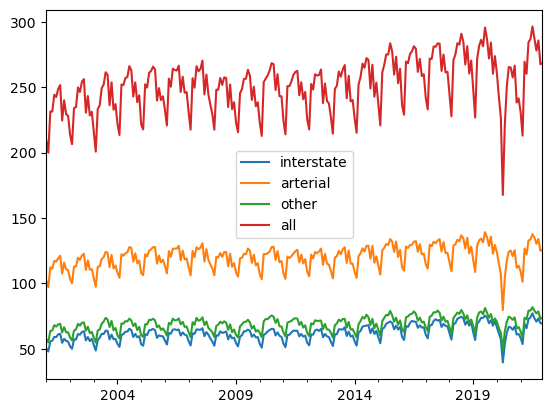

In [51]:
travel.plot.line()

In [52]:
travel['all']-travel['arterial']-travel['other']-travel['interstate']

2001-01-01    7.105427e-15
2001-02-01    0.000000e+00
2001-03-01    0.000000e+00
2001-04-01   -1.421085e-14
2001-05-01   -7.105427e-15
                  ...     
2021-08-01   -1.421085e-14
2021-09-01    1.000000e-01
2021-10-01    1.421085e-14
2021-11-01    1.000000e-01
2021-12-01   -1.421085e-14
Length: 252, dtype: float64

In [53]:
travel[['all','arterial','other','interstate']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2001-01-01 to 2021-12-01
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   all         252 non-null    float64
 1   arterial    252 non-null    float64
 2   other       252 non-null    float64
 3   interstate  252 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


In [54]:
final_frame=travel[['all','arterial','other','interstate']]

In [55]:
final_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2001-01-01 to 2021-12-01
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   all         252 non-null    float64
 1   arterial    252 non-null    float64
 2   other       252 non-null    float64
 3   interstate  252 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


In [56]:
final_fatal[final_fatal['state']=='USA'].iloc[2:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2000-12-31 to 2020-12-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       21 non-null     object 
 1   interstate  21 non-null     float64
 2   arterial    21 non-null     float64
 3   other       21 non-null     float64
 4   total       21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1008.0+ bytes


In [57]:
final_frame=final_frame.resample('Y',label='right').sum()

In [58]:
final_frame

all     arterial       other  interstate
2001-12-31  2781.462000  1340.670990  766.877009  673.914001
2002-12-31  2829.336054  1360.241176  775.964694  693.130184
2003-12-31  2868.108661  1372.741014  795.805122  699.562525
2004-12-31  2962.400000  1429.900000  811.100000  721.300000
2005-12-31  2966.700000  1434.000000  809.600000  722.900000
2006-12-31  3014.000000  1454.400000  824.400000  735.300000
2007-12-31  3003.400000  1450.500000  820.700000  731.900000
2008-12-31  2925.800000  1412.900000  799.000000  713.700000
2009-12-31  2932.600000  1415.700000  798.500000  718.500000
2010-12-31  2998.400000  1434.200000  838.200000  726.500000
2011-12-31  2962.900000  1416.900000  825.600000  720.300000
2012-12-31  2954.100000  1419.700000  809.100000  725.200000
2013-12-31  2972.100000  1425.900000  813.300000  732.800000
2014-12-31  3040.600000  1449.700000  834.000000  757.000000
2015-12-31  3147.900000  1499.900000  860.000000  788.000000
2016-12-31  3169.300000  1499.400000  870.800000  799.000000
2017-12-31  3208.600000  1515.800000  880.200000  812.600000
2018-12-31  3240.300000  1533.800000  878.200000  828.700000
2019-12-31  3269.000000  1545.100000  887.800000  836.300000
2020-12-31  2903.500000  1368.200000  808.100000  727.400000
2021-12-31  3228.900000  1512.900000  889.200000  826.600000

In [59]:
final_fatal

state  interstate  arterial   other   total
year                                                           
1998-12-31        Alabama       130.0     286.0   933.0  1071.0
1998-12-31         Alaska        22.0      12.0    45.0    70.0
1998-12-31        Arizona       201.0     298.0   757.0   980.0
1998-12-31       Arkansas        75.0     176.0   537.0   625.0
1998-12-31     California       466.0    1350.0  2720.0  3494.0
...                   ...         ...       ...     ...     ...
2020-12-31       Virginia       138.0     253.0   697.0   850.0
2020-12-31     Washington        59.0     145.0   444.0   560.0
2020-12-31  West Virginia        27.0      61.0   233.0   267.0
2020-12-31      Wisconsin        40.0     189.0   559.0   614.0
2020-12-31        Wyoming        28.0      45.0    98.0   127.0

[1196 rows x 5 columns]

In [60]:
final_frame[['interstate_death','arterial_death','other_death','total_death']]=math.nan

In [61]:
final_frame['arterial_death']=final_fatal[final_fatal['state']=='USA'].iloc[2:]['arterial']

In [62]:
final_frame['other_death']=final_fatal[final_fatal['state']=='USA'].iloc[2:]['other']

In [63]:
final_frame['total_death']=final_fatal[final_fatal['state']=='USA'].iloc[2:]['total']

In [64]:
final_frame['interstate_death']=final_fatal[final_fatal['state']=='USA'].iloc[2:]['interstate']

Finishing
## Demonstrate regression line and hypothesis testing
## Slide show

Bonus
## Did some states have spikes and some not?
reading in other state sets
2021 data.  
## Frontage, did some classify differentyly
## Steamlit dashboard this.  

In [65]:
final_frame

all     arterial       other  interstate  \
2001-12-31  2781.462000  1340.670990  766.877009  673.914001   
2002-12-31  2829.336054  1360.241176  775.964694  693.130184   
2003-12-31  2868.108661  1372.741014  795.805122  699.562525   
2004-12-31  2962.400000  1429.900000  811.100000  721.300000   
2005-12-31  2966.700000  1434.000000  809.600000  722.900000   
2006-12-31  3014.000000  1454.400000  824.400000  735.300000   
2007-12-31  3003.400000  1450.500000  820.700000  731.900000   
2008-12-31  2925.800000  1412.900000  799.000000  713.700000   
2009-12-31  2932.600000  1415.700000  798.500000  718.500000   
2010-12-31  2998.400000  1434.200000  838.200000  726.500000   
2011-12-31  2962.900000  1416.900000  825.600000  720.300000   
2012-12-31  2954.100000  1419.700000  809.100000  725.200000   
2013-12-31  2972.100000  1425.900000  813.300000  732.800000   
2014-12-31  3040.600000  1449.700000  834.000000  757.000000   
2015-12-31  3147.900000  1499.900000  860.000000  788.000000   
2016-12-31  3169.300000  1499.400000  870.800000  799.000000   
2017-12-31  3208.600000  1515.800000  880.200000  812.600000   
2018-12-31  3240.300000  1533.800000  878.200000  828.700000   
2019-12-31  3269.000000  1545.100000  887.800000  836.300000   
2020-12-31  2903.500000  1368.200000  808.100000  727.400000   
2021-12-31  3228.900000  1512.900000  889.200000  826.600000   

            interstate_death  arterial_death  other_death  total_death  
2001-12-31            5665.0         11586.0      34640.0      42196.0  
2002-12-31            5780.0         11524.0      35427.0      43005.0  
2003-12-31            5644.0         11700.0      35318.0      42884.0  
2004-12-31            5829.0         11687.0      34822.0      42836.0  
2005-12-31            5982.0         11920.0      35223.0      43510.0  
2006-12-31            5550.0         11691.0      34908.0      42708.0  
2007-12-31            5362.0         11304.0      34119.0      41259.0  
2008-12-31            4722.0         10437.0      30816.0      37423.0  
2009-12-31            4094.0          9978.0      28235.0      33883.0  
2010-12-31            4237.0          9512.0      27141.0      32999.0  
2011-12-31            4128.0          9469.0      26770.0      32479.0  
2012-12-31            3985.0          9907.0      28365.0      33782.0  
2013-12-31            4095.0          9818.0      27581.0      32893.0  
2014-12-31            4094.0         10120.0      27252.0      32744.0  
2015-12-31            4460.0         12289.0      28615.0      35484.0  
2016-12-31            5081.0         13237.0      30868.0      37806.0  
2017-12-31            4753.0         12789.0      30999.0      37473.0  
2018-12-31            4774.0         12521.0      30391.0      36835.0  
2019-12-31            4668.0         12497.0      29994.0      36355.0  
2020-12-31            4899.0         12834.0      31464.0      38824.0  
2021-12-31               NaN             NaN          NaN          NaN

<AxesSubplot:>

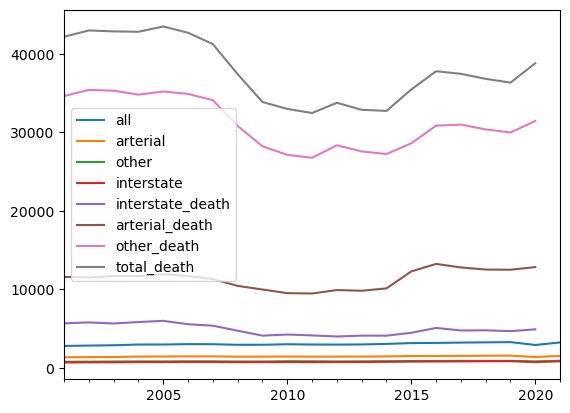

In [66]:
final_frame.plot.line()

In [67]:
final_frame.corr()

all  arterial     other  interstate  interstate_death  \
all               1.000000  0.984998  0.984552    0.986468         -0.289376   
arterial          0.984998  1.000000  0.951081    0.949775         -0.262459   
other             0.984552  0.951081  1.000000    0.970709         -0.324762   
interstate        0.986468  0.949775  0.970709    1.000000         -0.284099   
interstate_death -0.289376 -0.262459 -0.324762   -0.284099          1.000000   
arterial_death    0.434288  0.373913  0.413085    0.505989          0.546098   
other_death      -0.343110 -0.312441 -0.392516   -0.329592          0.974585   
total_death      -0.324158 -0.296258 -0.368282   -0.311984          0.984224   

                  arterial_death  other_death  total_death  
all                     0.434288    -0.343110    -0.324158  
arterial                0.373913    -0.312441    -0.296258  
other                   0.413085    -0.392516    -0.368282  
interstate              0.505989    -0.329592    -0.311984  
interstate_death        0.546098     0.974585     0.984224  
arterial_death          1.000000     0.511672     0.544775  
other_death             0.511672     1.000000     0.995992  
total_death             0.544775     0.995992     1.000000

<AxesSubplot:>

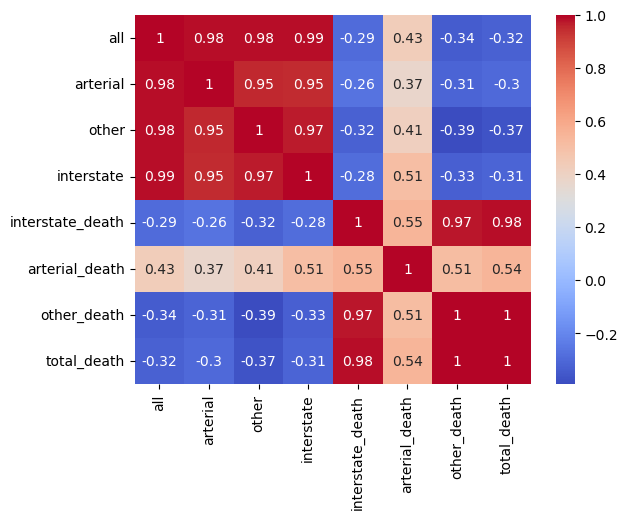

In [68]:
sns.heatmap(final_frame.corr(),cmap='coolwarm',annot=True)

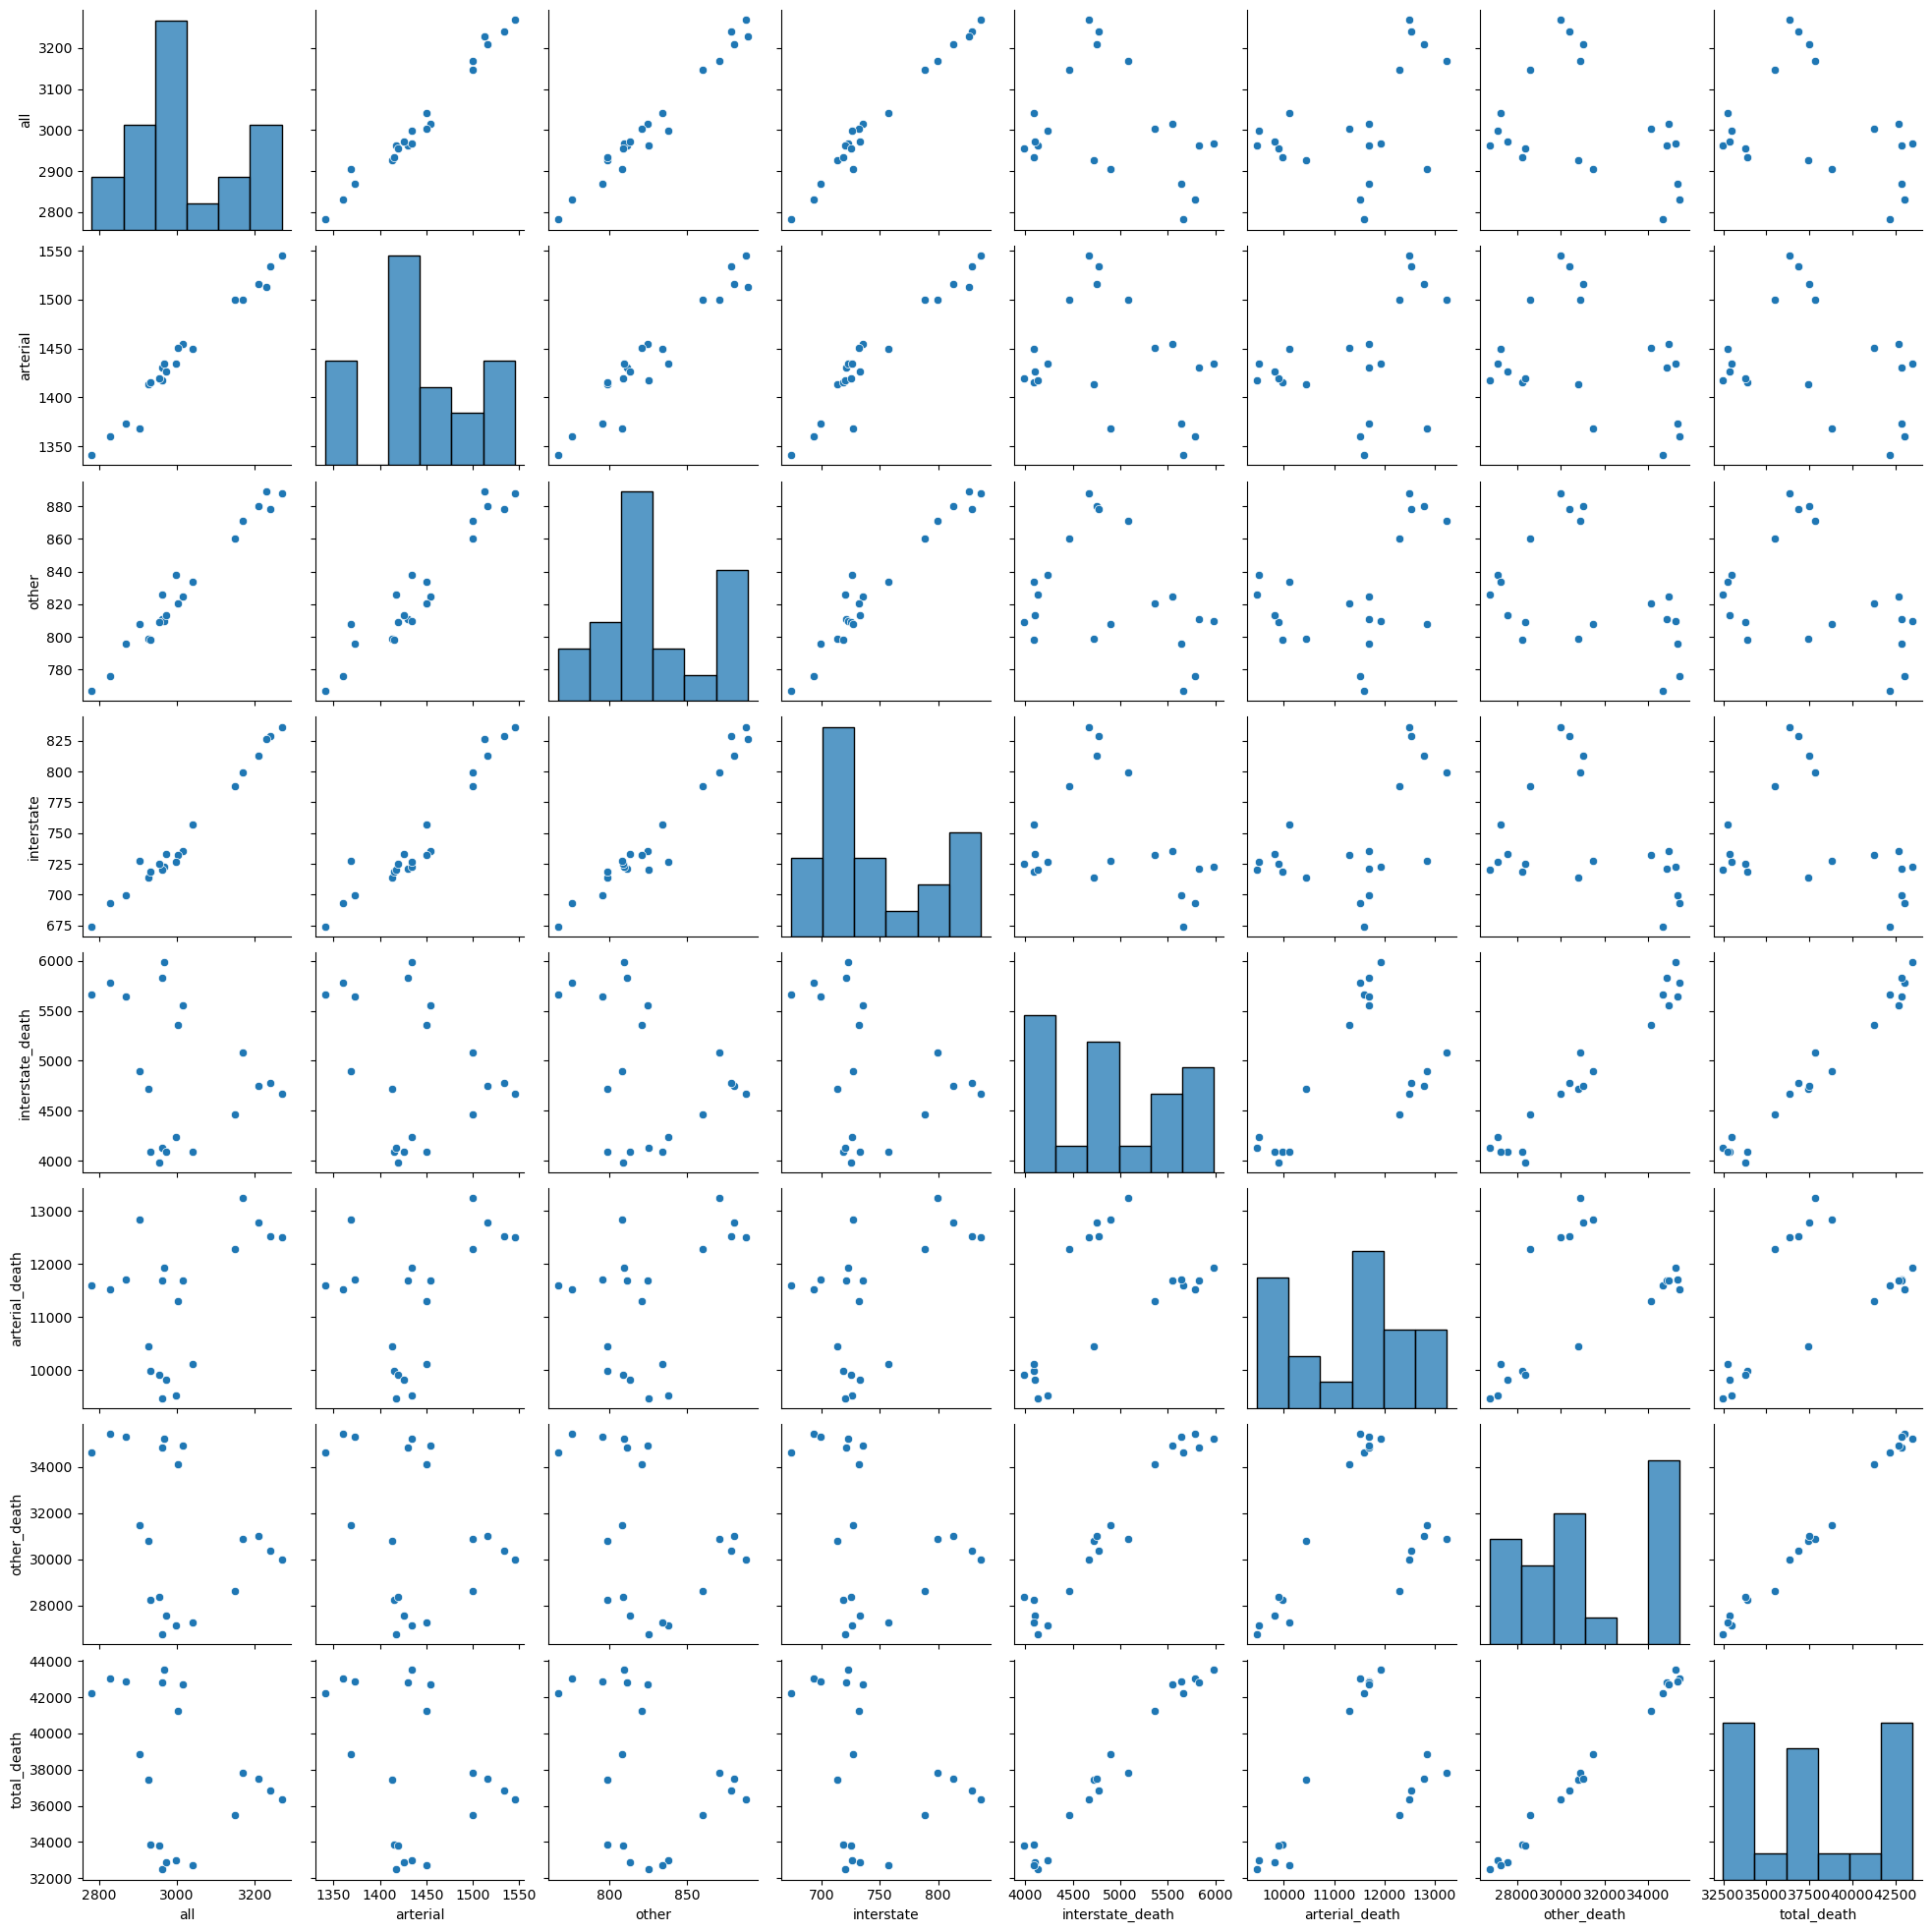

In [69]:
sns.pairplot(final_frame)

	other_death	total_death

In [70]:
final_frame['interstate_death/vmt']=final_frame['interstate_death']/final_frame['all']
final_frame['arterial_death/vmt']=final_frame['arterial_death']/final_frame['all']
final_frame['total_death/vmt']=final_frame['total_death']/final_frame['all']
final_frame['other_death/vmt']=final_frame['other_death']/final_frame['all']




<AxesSubplot:>

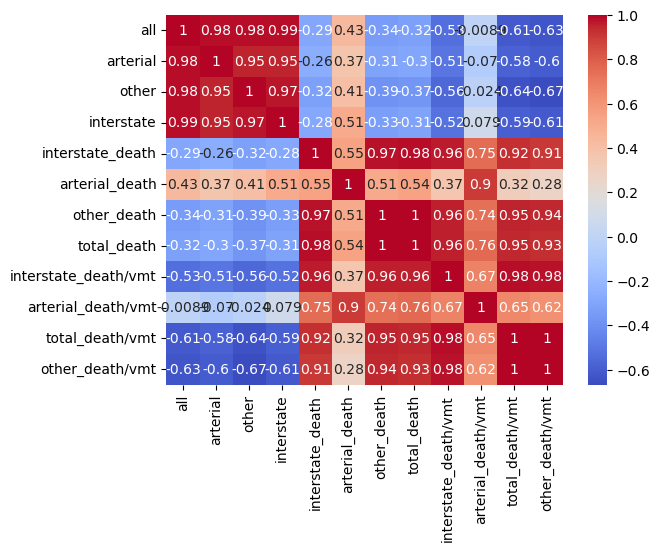

In [72]:
sns.heatmap(final_frame.corr(),cmap='coolwarm',annot=True)

In [93]:
state_travel=pd.read_csv('final_state_travel.csv',index_col=3)

In [94]:
state_list=state_travel.state.unique()

In [102]:
state_travel.index=pd.to_datetime(state_travel.index)

In [112]:
fatalities.year=pd.to_datetime(fatalities.year)

In [131]:
state_dict={}
for name in state_list:
    state_dict[name]=state_travel[state_travel['state']==name].resample('Y').sum()
    state_dict[name].index=state_dict[name].index.year

    


In [380]:
state_dict['California']

Unnamed: 0  vmt_arterial_rural  vmt_arterial_urban   vmt_all
date                                                              
2002          40              4418.0             19528.0   29052.0
2003        6753             49080.0            221638.0  325089.0
2004        9507             50791.0            226225.0  332902.0
2005       21634             56625.0            249352.0  362926.0
2006       37768             65741.0            306185.0  440066.0
2007       43196             53141.0            264939.0  375143.0
2008       45462             42833.0            225559.0  316353.0
2009       52806             43697.0            226352.0  316298.0
2010       60150             43848.0            230983.0  325931.0
2011       67494             41898.0            227686.0  320294.0
2012       74838             41637.0            226051.0  318038.0
2013       82182             42702.0            231164.0  324412.0
2014       89526             43119.0            234981.0  329582.0
2015       96870             40435.0            256832.0  354118.0
2016      104214             42046.0            258639.0  364592.0
2017      111558             40556.0            247297.0  353277.0
2018      118902             39387.0            250726.0  351900.0
2019      126246             39048.0            247351.0  351960.0
2020      122177             31706.0            188291.0  272048.0

In [379]:
fatalities_state_dict['Maine']

state  rural_interstate  urban_interstate  freeway_expressway  \
date                                                                  
2002  Maine              14.0               3.0                 3.0   
2003  Maine              15.0               0.0                 0.0   
2004  Maine              14.0               4.0                 3.0   
2005  Maine              20.0               1.0                 0.0   
2006  Maine               9.0               6.0                 2.0   
2007  Maine              15.0               0.0                 3.0   
2008  Maine              10.0               1.0                 0.0   
2009  Maine              10.0               0.0                 0.0   
2010  Maine              10.0               0.0                 0.0   
2011  Maine               4.0               0.0                 0.0   
2012  Maine               3.0               0.0                 0.0   
2013  Maine               7.0               1.0                 0.0   
2014  Maine               3.0               1.0                 0.0   
2015  Maine               5.0               0.0                 2.0   
2016  Maine               3.0               0.0                 2.0   
2017  Maine               7.0               6.0                 1.0   
2018  Maine               7.0               3.0                 1.0   
2019  Maine              11.0               3.0                 0.0   
2020  Maine               8.0               4.0                 0.0   

      other_arterial  minor_arterial  collector_arterial  local  unknown  \
date                                                                       
2002            35.0            33.0                64.0   57.0      7.0   
2003            59.0            36.0                52.0   43.0      2.0   
2004            48.0            30.0                60.0   35.0      0.0   
2005            38.0            19.0                63.0   27.0      1.0   
2006            25.0            33.0                77.0   34.0      2.0   
2007            39.0            37.0                53.0   36.0      0.0   
2008            27.0            42.0                46.0   29.0      0.0   
2009            33.0            45.0                35.0   36.0      0.0   
2010            15.0            29.0                60.0   45.0      2.0   
2011            12.0            50.0                 5.0   65.0      0.0   
2012            25.0            57.0                 0.0   79.0      0.0   
2013            22.0            37.0                 3.0   74.0      0.0   
2014            37.0            32.0                32.0   21.0      5.0   
2015            39.0            27.0                53.0   30.0      0.0   
2016            44.0            34.0                38.0   36.0      3.0   
2017            42.0            36.0                52.0   27.0      2.0   
2018            27.0            20.0                53.0   25.0      0.0   
2019            28.0            30.0                52.0   33.0      0.0   
2020            25.0            32.0                66.0   28.0      1.0   

      total  interstate  arterial  other  Unnamed: 0  vmt_arterial_rural  \
date                                                                       
2002  216.0        17.0      38.0  189.0           1               486.0   
2003  207.0        15.0      59.0  190.0        6285              6283.0   
2004  194.0        18.0      51.0  173.0        9039              6341.0   
2005  169.0        21.0      38.0  147.0       21127              6790.0   
2006  188.0        15.0      27.0  169.0       37144              8065.0   
2007  183.0        15.0      42.0  165.0       42650              6906.0   
2008  155.0        11.0      27.0  144.0       44994              5748.0   
2009  159.0        10.0      33.0  149.0       52338              5821.0   
2010  161.0        10.0      15.0  149.0       59682              6050.0   
2011  136.0         4.0      12.0  132.0       67026              5726.0   
2012 

In [133]:
fatalities_state_dict={}
for name in state_list:
    fatalities_state_dict[name]=fatalities[fatalities['state']==name].rename(columns={'year':'date'}).sort_values('date').set_index('date')
    fatalities_state_dict[name].index=fatalities_state_dict[name].index.year


In [134]:
fatalities_state_dict['Maine'].index

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='date')

In [135]:
for name in state_list:
    fatalities_state_dict[name]=fatalities_state_dict[name].merge(state_dict[name], on='date')
pair_plot_df=fatalities_state_dict[state_list[0]]

for name in state_list[1:]:
    pair_plot_df=pair_plot_df.append(fatalities_state_dict[name])

C:\Users\User\AppData\Local\Temp\ipykernel_26832\3304298954.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pair_plot_df=pair_plot_df.append(fatalities_state_dict[name])
C:\Users\User\AppData\Local\Temp\ipykernel_26832\3304298954.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pair_plot_df=pair_plot_df.append(fatalities_state_dict[name])
C:\Users\User\AppData\Local\Temp\ipykernel_26832\3304298954.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pair_plot_df=pair_plot_df.append(fatalities_state_dict[name])
C:\Users\User\AppData\Local\Temp\ipykernel_26832\3304298954.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pair_plot_

In [147]:
pair_plot_df.drop('Unnamed: 0',axis=1, inplace=True)

In [150]:
pair_plot_df.columns

Index(['state', 'rural_interstate', 'urban_interstate', 'freeway_expressway',
       'other_arterial', 'minor_arterial', 'collector_arterial', 'local',
       'unknown', 'total', 'interstate', 'arterial', 'other',
       'vmt_arterial_rural', 'vmt_arterial_urban', 'vmt_all'],
      dtype='object')

In [159]:
pair_plot_df.reset_index(inplace=True)

In [160]:
pair_plot_df

date        state  rural_interstate  urban_interstate  \
0    2002  Connecticut               3.0              49.0   
1    2003  Connecticut               9.0              60.0   
2    2004  Connecticut               1.0              42.0   
3    2005  Connecticut               1.0              40.0   
4    2006  Connecticut               2.0              45.0   
..    ...          ...               ...               ...   
964  2016      Wyoming              34.0               4.0   
965  2017      Wyoming              24.0               7.0   
966  2018      Wyoming              26.0               1.0   
967  2019      Wyoming              42.0               3.0   
968  2020      Wyoming              23.0               5.0   

     freeway_expressway  other_arterial  minor_arterial  collector_arterial  \
0                  18.0            83.0            79.0                45.0   
1                  22.0            59.0            60.0                40.0   
2                  22.0            55.0            74.0                67.0   
3                  16.0            62.0            70.0                39.0   
4                  23.0            59.0            80.0                57.0   
..                  ...             ...             ...                 ...   
964                 0.0            33.0             8.0                19.0   
965                 0.0            41.0            13.0                14.0   
966                 0.0            51.0             9.0                14.0   
967                 0.0            49.0            17.0                13.0   
968                 0.0            45.0             9.0                37.0   

     local  unknown  total  interstate  arterial  other  vmt_arterial_rural  \
0     48.0      0.0  325.0        52.0     101.0  255.0               143.0   
1     46.0      2.0  298.0        69.0      81.0  205.0              1969.0   
2     31.0      2.0  294.0        43.0      77.0  227.0              2008.0   
3     49.0      1.0  278.0        41.0      78.0  220.0              2137.0   
4     44.0      1.0  311.0        47.0      82.0  240.0              2570.0   
..     ...      ...    ...         ...       ...    ...                 ...   
964   14.0      0.0  112.0        38.0      33.0   74.0              4686.0   
965   24.0      0.0  123.0        31.0      41.0   92.0              4712.0   
966    9.0      1.0  111.0        27.0      51.0   83.0              4675.0   
967   20.0      3.0  147.0        45.0      49.0   99.0              4719.0   
968    7.0      1.0  127.0        28.0      45.0   98.0              4230.0   

     vmt_arterial_urban  vmt_all  
0                1804.0   2467.0  
1               22174.0  31071.0  
2               22530.0  31600.0  
3               24156.0  33992.0  
4               29145.0  41055.0  
..                  ...      ...  
964              1748.0   9588.0  
965              1735.0   9485.0  
966              1759.0   9438.0  
967              1854.0   9974.0  
968              1625.0   9004.0  

[969 rows x 17 columns]

In [154]:
short_df=pair_plot_df[['state','total','interstate','vmt_arterial_rural', 'vmt_arterial_urban', 'vmt_all']].reset_index()

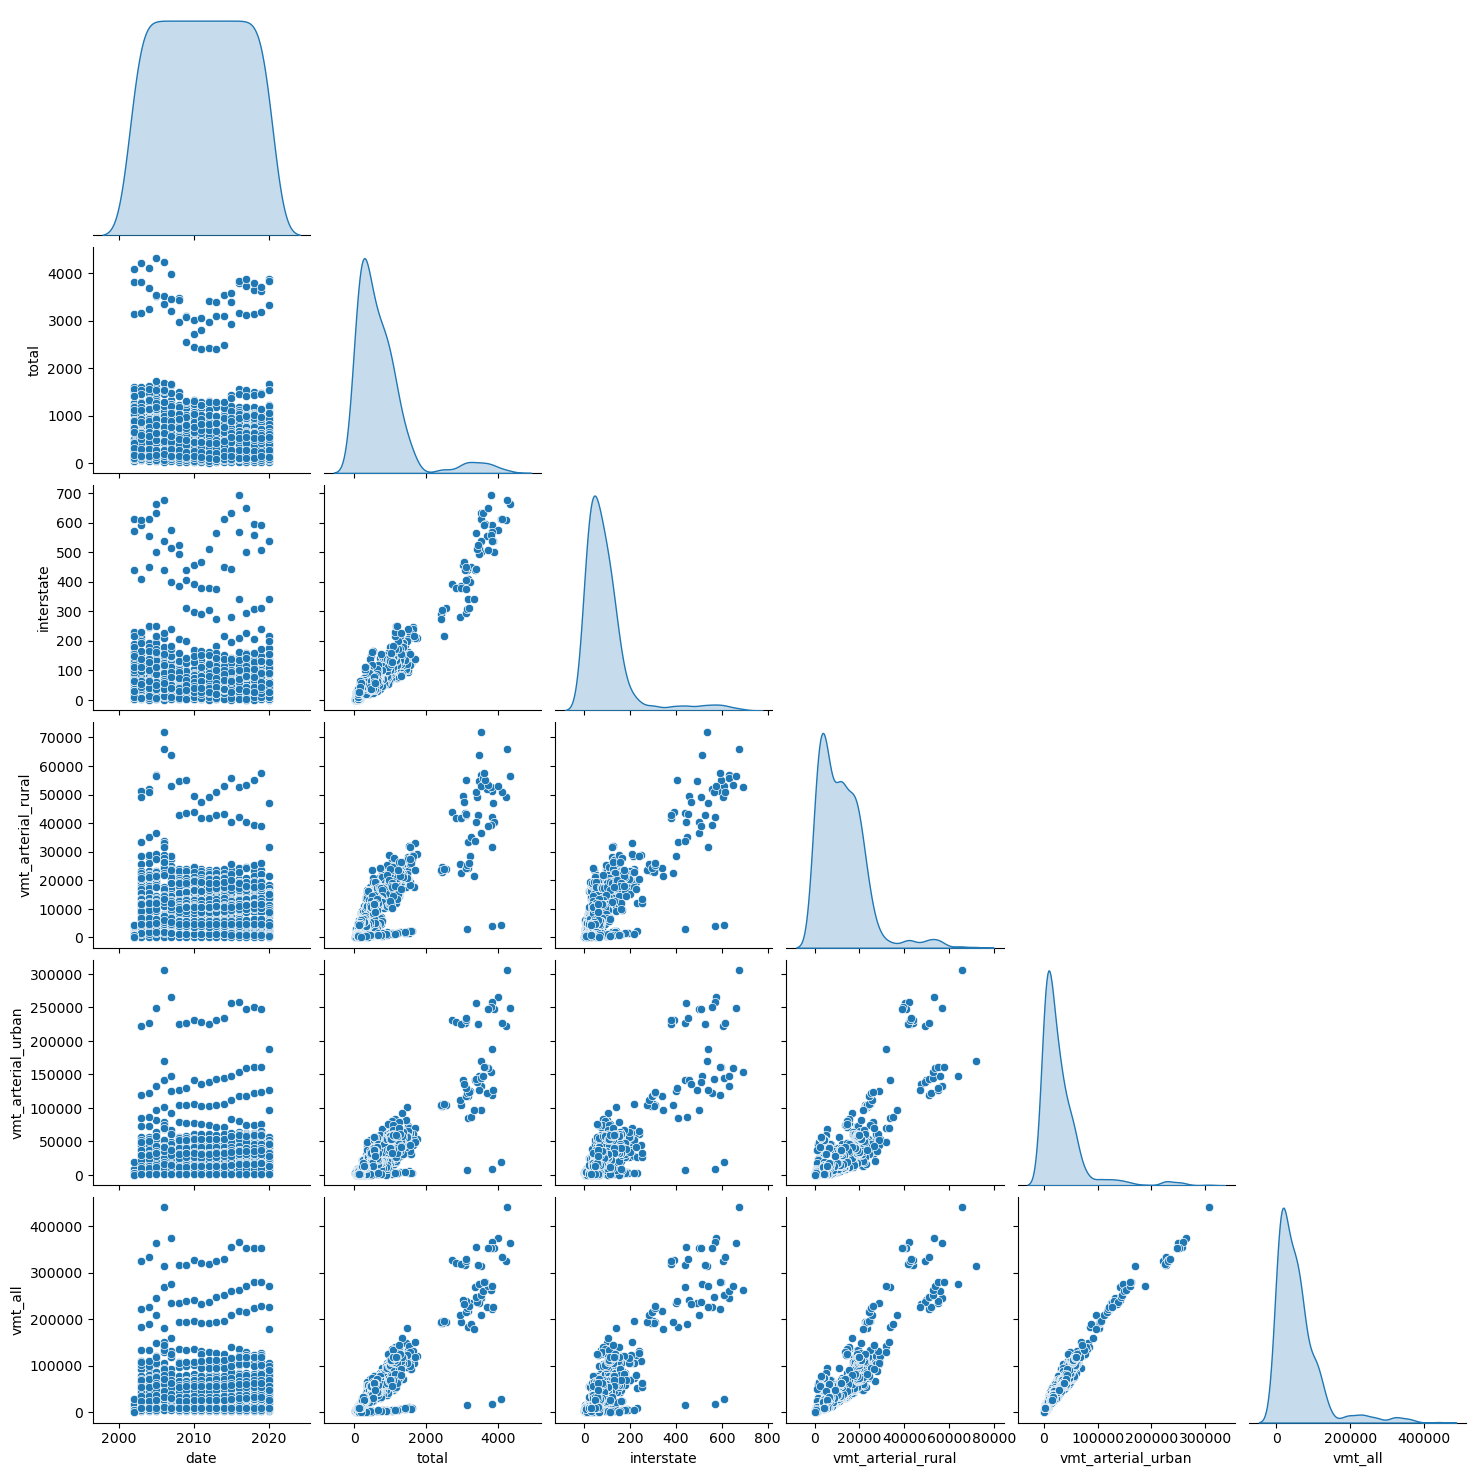

In [155]:
sns.pairplot(short_df,diag_kind="kde", corner=True)

<AxesSubplot:>

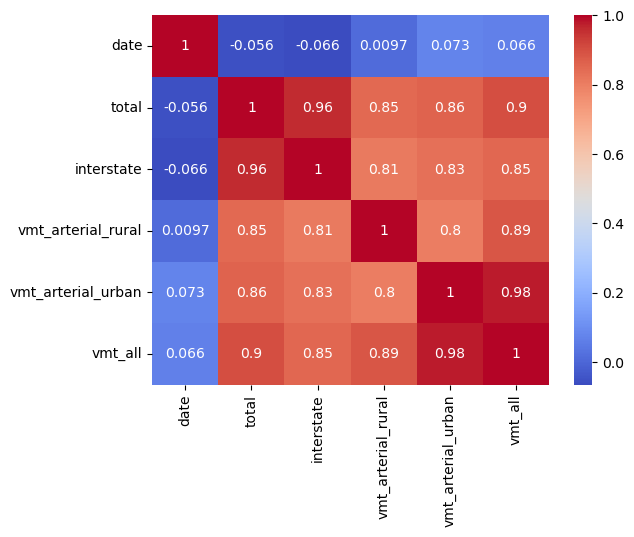

In [162]:
sns.heatmap(short_df.corr(),cmap='coolwarm',annot=True)

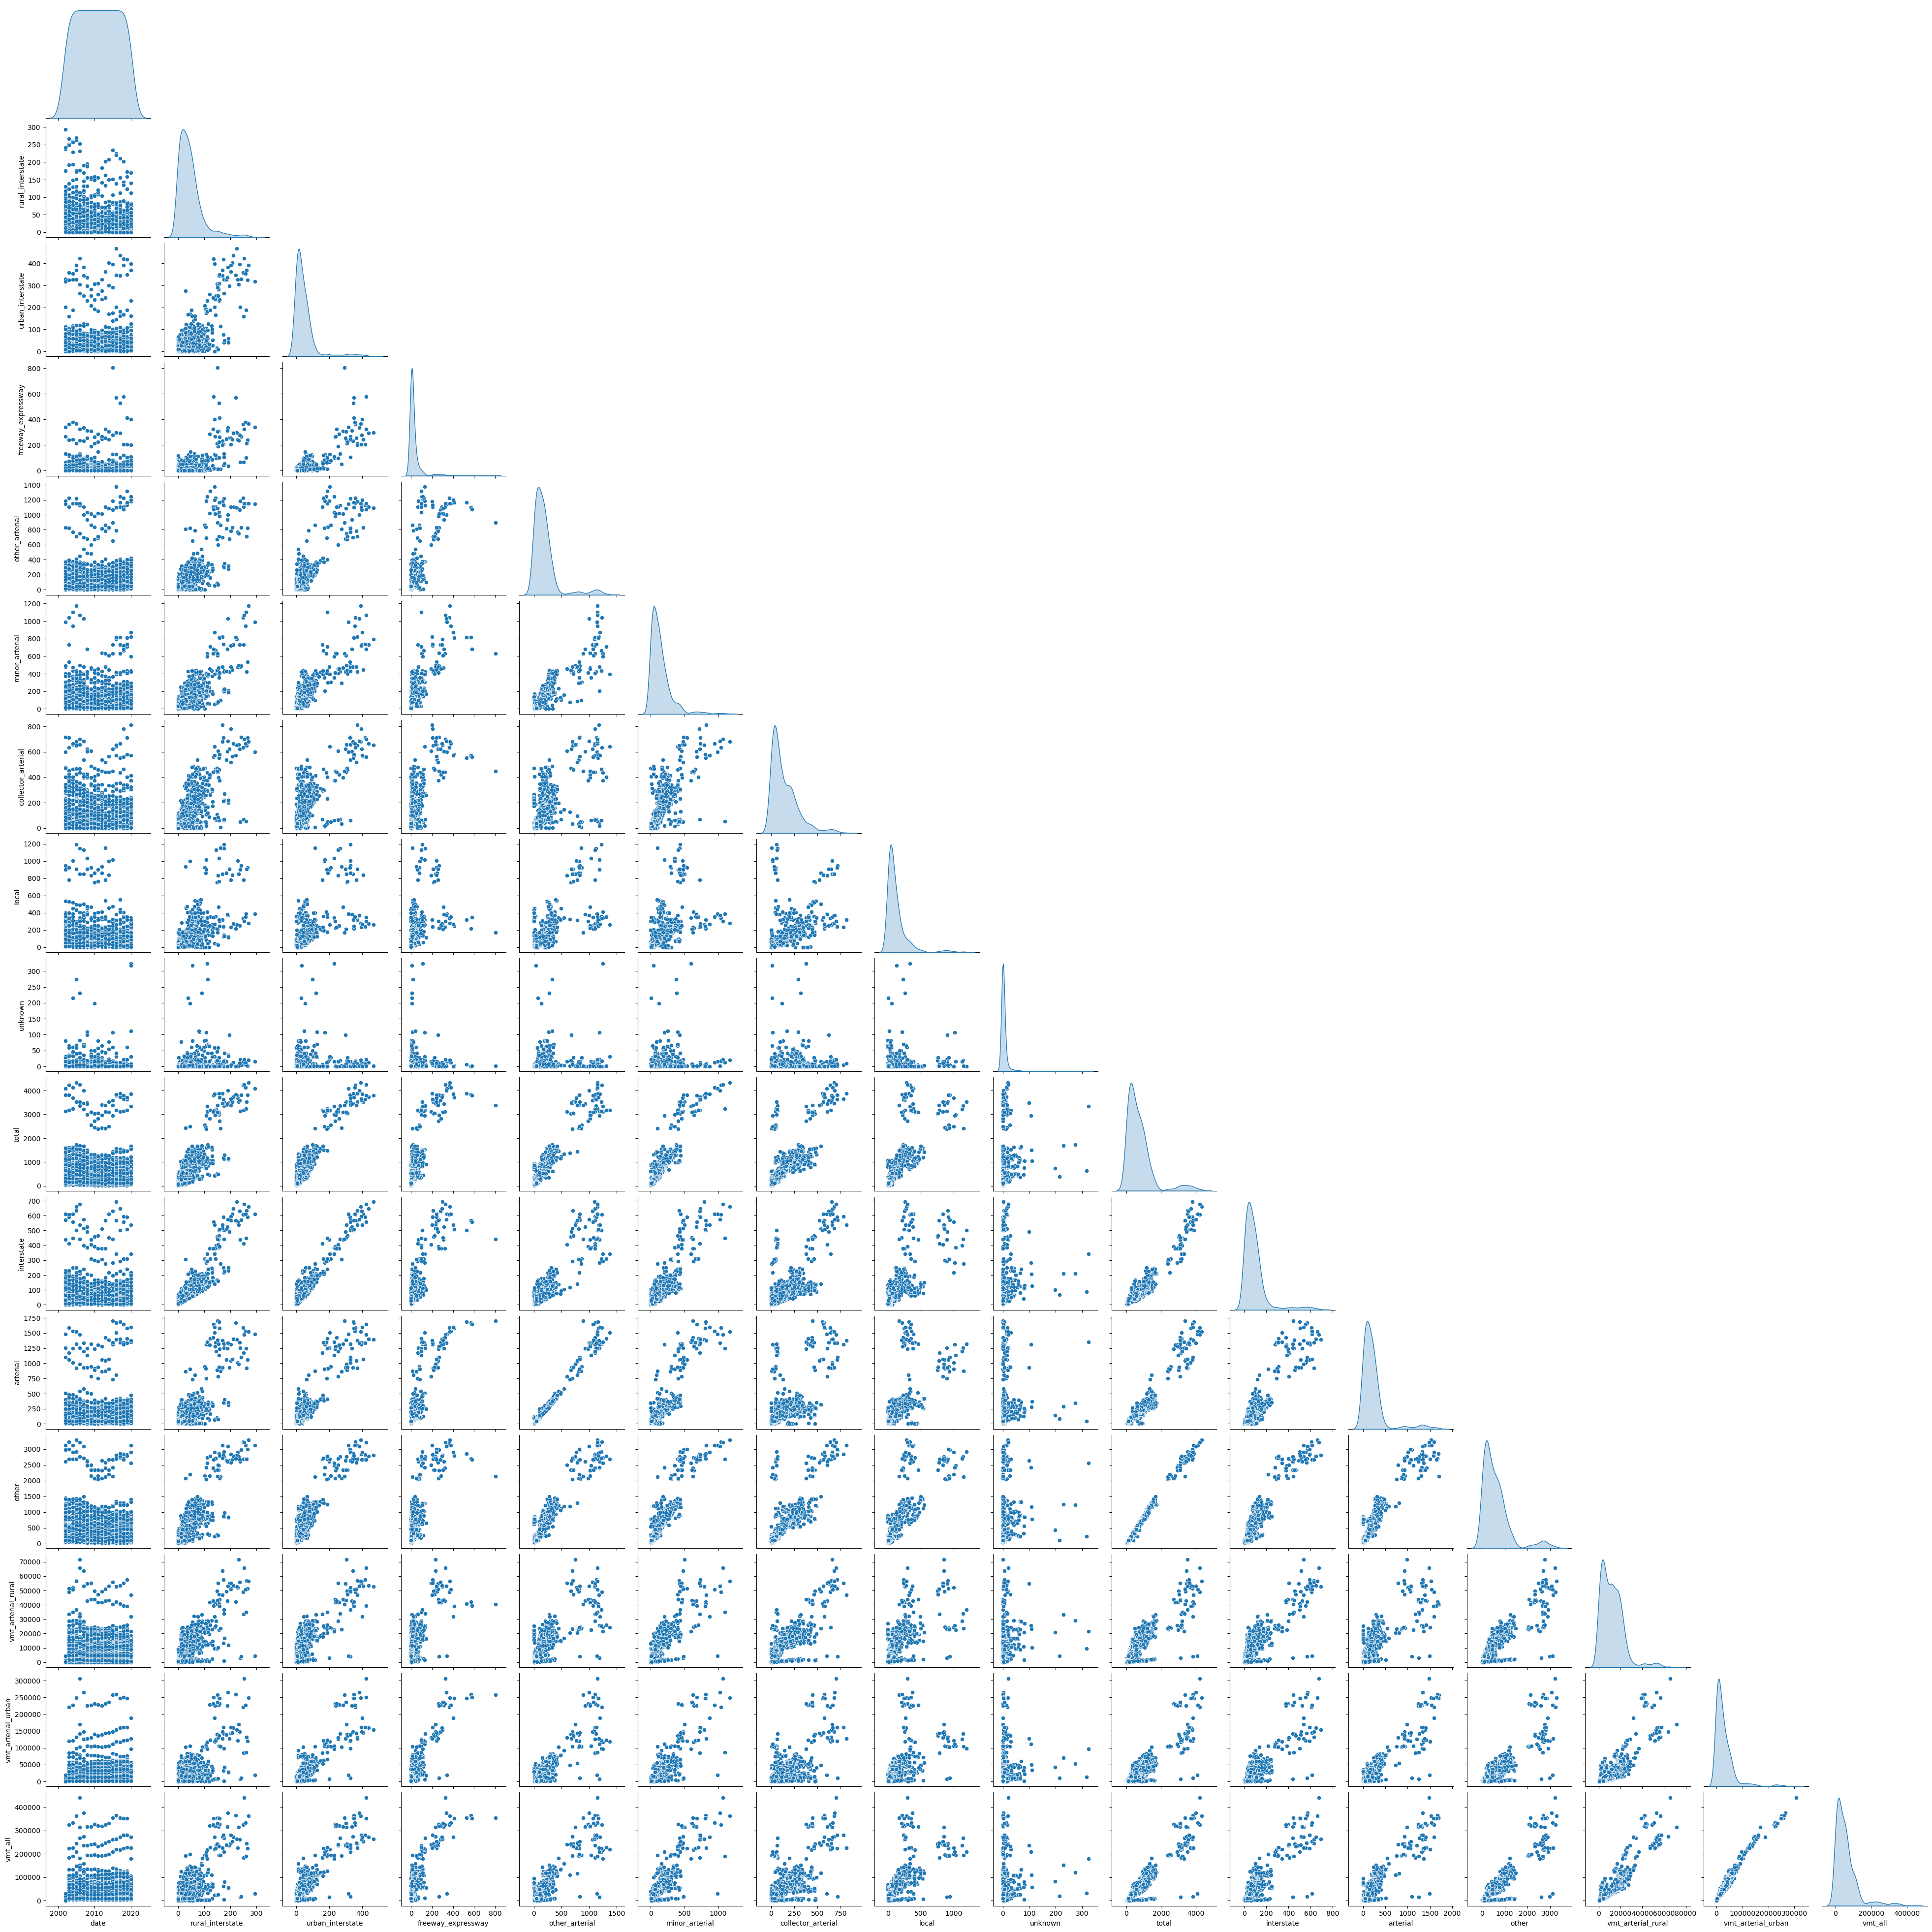

In [161]:
sns.pairplot(pair_plot_df,diag_kind="kde", corner=True)

<AxesSubplot:>

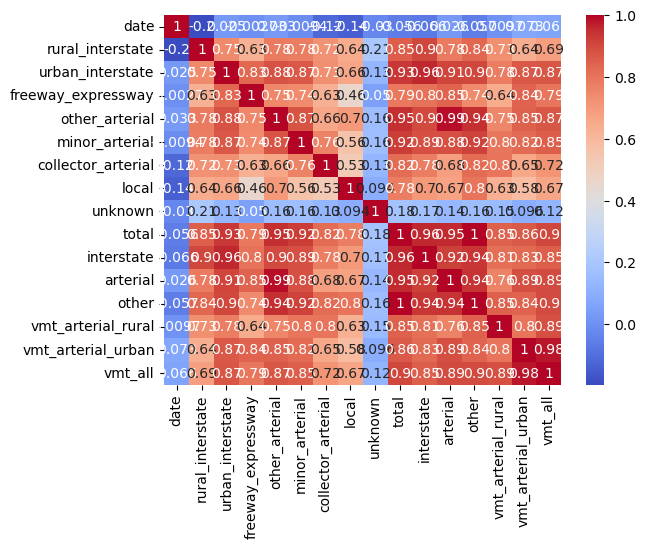

In [163]:
sns.heatmap(pair_plot_df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='vmt_all', ylabel='total'>

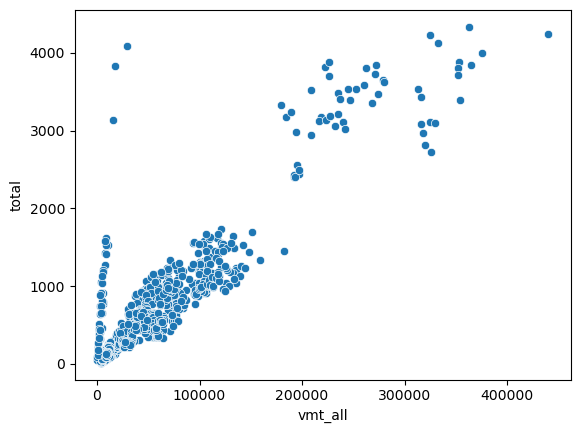

In [137]:
sns.scatterplot(data=pair_plot_df,x='vmt_all',y='total')

<AxesSubplot:xlabel='vmt_all', ylabel='total'>

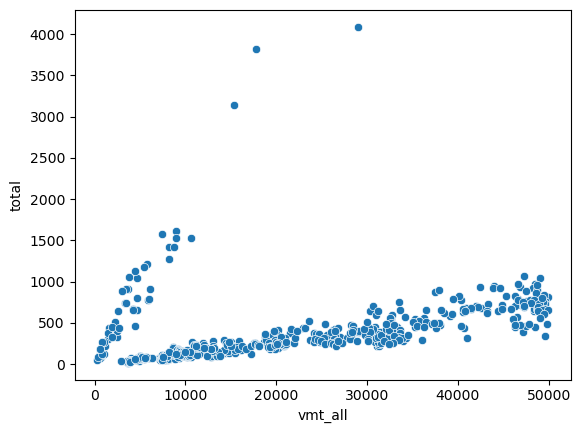

In [189]:
sns.scatterplot(data=pair_plot_df[pair_plot_df['vmt_all']<50000],x='vmt_all',y='total')

In [208]:
(pair_plot_df['vmt_all']<20000) & (pair_plot_df['total']>500)

0      False
1      False
2      False
3      False
4      False
       ...  
964    False
965    False
966    False
967    False
968    False
Length: 969, dtype: bool

In [235]:
pair_plot_df

date        state  rural_interstate  urban_interstate  \
0    2002  Connecticut               3.0              49.0   
1    2003  Connecticut               9.0              60.0   
2    2004  Connecticut               1.0              42.0   
3    2005  Connecticut               1.0              40.0   
4    2006  Connecticut               2.0              45.0   
..    ...          ...               ...               ...   
964  2016      Wyoming              34.0               4.0   
965  2017      Wyoming              24.0               7.0   
966  2018      Wyoming              26.0               1.0   
967  2019      Wyoming              42.0               3.0   
968  2020      Wyoming              23.0               5.0   

     freeway_expressway  other_arterial  minor_arterial  collector_arterial  \
0                  18.0            83.0            79.0                45.0   
1                  22.0            59.0            60.0                40.0   
2                  22.0            55.0            74.0                67.0   
3                  16.0            62.0            70.0                39.0   
4                  23.0            59.0            80.0                57.0   
..                  ...             ...             ...                 ...   
964                 0.0            33.0             8.0                19.0   
965                 0.0            41.0            13.0                14.0   
966                 0.0            51.0             9.0                14.0   
967                 0.0            49.0            17.0                13.0   
968                 0.0            45.0             9.0                37.0   

     local  unknown  total  interstate  arterial  other  vmt_arterial_rural  \
0     48.0      0.0  325.0        52.0     101.0  255.0               143.0   
1     46.0      2.0  298.0        69.0      81.0  205.0              1969.0   
2     31.0      2.0  294.0        43.0      77.0  227.0              2008.0   
3     49.0      1.0  278.0        41.0      78.0  220.0              2137.0   
4     44.0      1.0  311.0        47.0      82.0  240.0              2570.0   
..     ...      ...    ...         ...       ...    ...                 ...   
964   14.0      0.0  112.0        38.0      33.0   74.0              4686.0   
965   24.0      0.0  123.0        31.0      41.0   92.0              4712.0   
966    9.0      1.0  111.0        27.0      51.0   83.0              4675.0   
967   20.0      3.0  147.0        45.0      49.0   99.0              4719.0   
968    7.0      1.0  127.0        28.0      45.0   98.0              4230.0   

     vmt_arterial_urban  vmt_all  
0                1804.0   2467.0  
1               22174.0  31071.0  
2               22530.0  31600.0  
3               24156.0  33992.0  
4               29145.0  41055.0  
..                  ...      ...  
964              1748.0   9588.0  
965              1735.0   9485.0  
966              1759.0   9438.0  
967              1854.0   9974.0  
968              1625.0   9004.0  

[969 rows x 17 columns]

In [209]:
pair_plot_df[(pair_plot_df['vmt_all']<20000) & (pair_plot_df['total']>500)]

date           state  rural_interstate  urban_interstate  \
76   2002      New Jersey              27.0              68.0   
95   2002        New York              62.0              56.0   
114  2002    Pennsylvania              69.0              59.0   
209  2002         Florida             237.0             201.0   
228  2002         Georgia             131.0             100.0   
247  2002        Maryland              24.0              63.0   
266  2002  North Carolina              75.0              62.0   
285  2002  South Carolina             100.0              11.0   
304  2002        Virginia              61.0              71.0   
342  2002        Illinois              75.0             112.0   
361  2002         Indiana              78.0               0.0   
399  2002          Kansas              23.0              27.0   
418  2002        Michigan              48.0              72.0   
437  2002       Minnesota              33.0              40.0   
456  2002        Missouri              91.0             100.0   
513  2002            Ohio              53.0              81.0   
551  2002       Wisconsin              33.0              25.0   
570  2002         Alabama             112.0              51.0   
589  2002        Arkansas              55.0              39.0   
608  2002        Kentucky              59.0              34.0   
627  2002       Louisiana              93.0              35.0   
646  2002     Mississippi             101.0               1.0   
665  2002        Oklahoma              74.0              44.0   
684  2002       Tennessee             111.0              68.0   
703  2002           Texas             241.0             329.0   
741  2002         Arizona             175.0              40.0   
779  2002        Colorado             108.0              48.0   
931  2002      Washington              30.0              39.0   

     freeway_expressway  other_arterial  minor_arterial  collector_arterial  \
76                 65.0           209.0           112.0               102.0   
95                131.0           377.0           305.0               274.0   
114                30.0           372.0           399.0               312.0   
209                67.0          1185.0           477.0                49.0   
228                11.0           325.0           370.0               294.0   
247                47.0           186.0           127.0               123.0   
266                22.0           232.0           167.0               481.0   
285                 5.0           189.0           263.0               402.0   
304                24.0           193.0           196.0               235.0   
342                17.0           332.0           255.0               230.0   
361                 0.0            29.0           138.0               187.0   
399                13.0           151.0           101.0               115.0   
418                31.0           301.0           240.0               343.0   
437                16.0           119.0           182.0               186.0   
456                55.0           268.0           112.0               278.0   
513                63.0           202.0           243.0               480.0   
551                 8.0           198.0           174.0               206.0   
570                17.0           213.0            58.0               295.0   
589                 8.0           150.0           128.0               129.0   
608                10.0           189.0           126.0               324.0   
627                 2.0           241.0           133.0               290.0   
646                 0.0             3.0             1.0               470.0   
665                17.0           158.0           143.0               164.0   
684                10.0           245.0           253.0               293.0   
703               267.0           830.0           489.0               717.0   
741                44.0           299.0           201.0          

In [244]:
#This is a problem, I actually only have one month for 2002, it's december  So i'll be dropping 2002.
pd.set_option('display.max_rows', 900)
drop_mask=pair_plot_df['date']==2002
drop_list=[]
for x in range(len(drop_mask)):
    if drop_mask[x]:
        drop_list.append(x)

pair_plot_df.drop(drop_list,axis=0,inplace=True)

<AxesSubplot:xlabel='vmt_all', ylabel='total'>

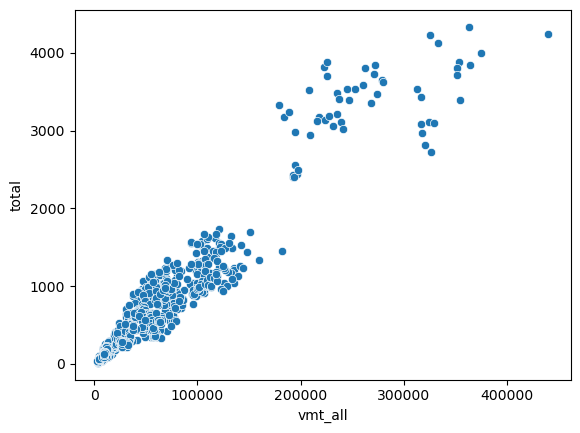

In [245]:
sns.scatterplot(data=pair_plot_df,x='vmt_all',y='total')

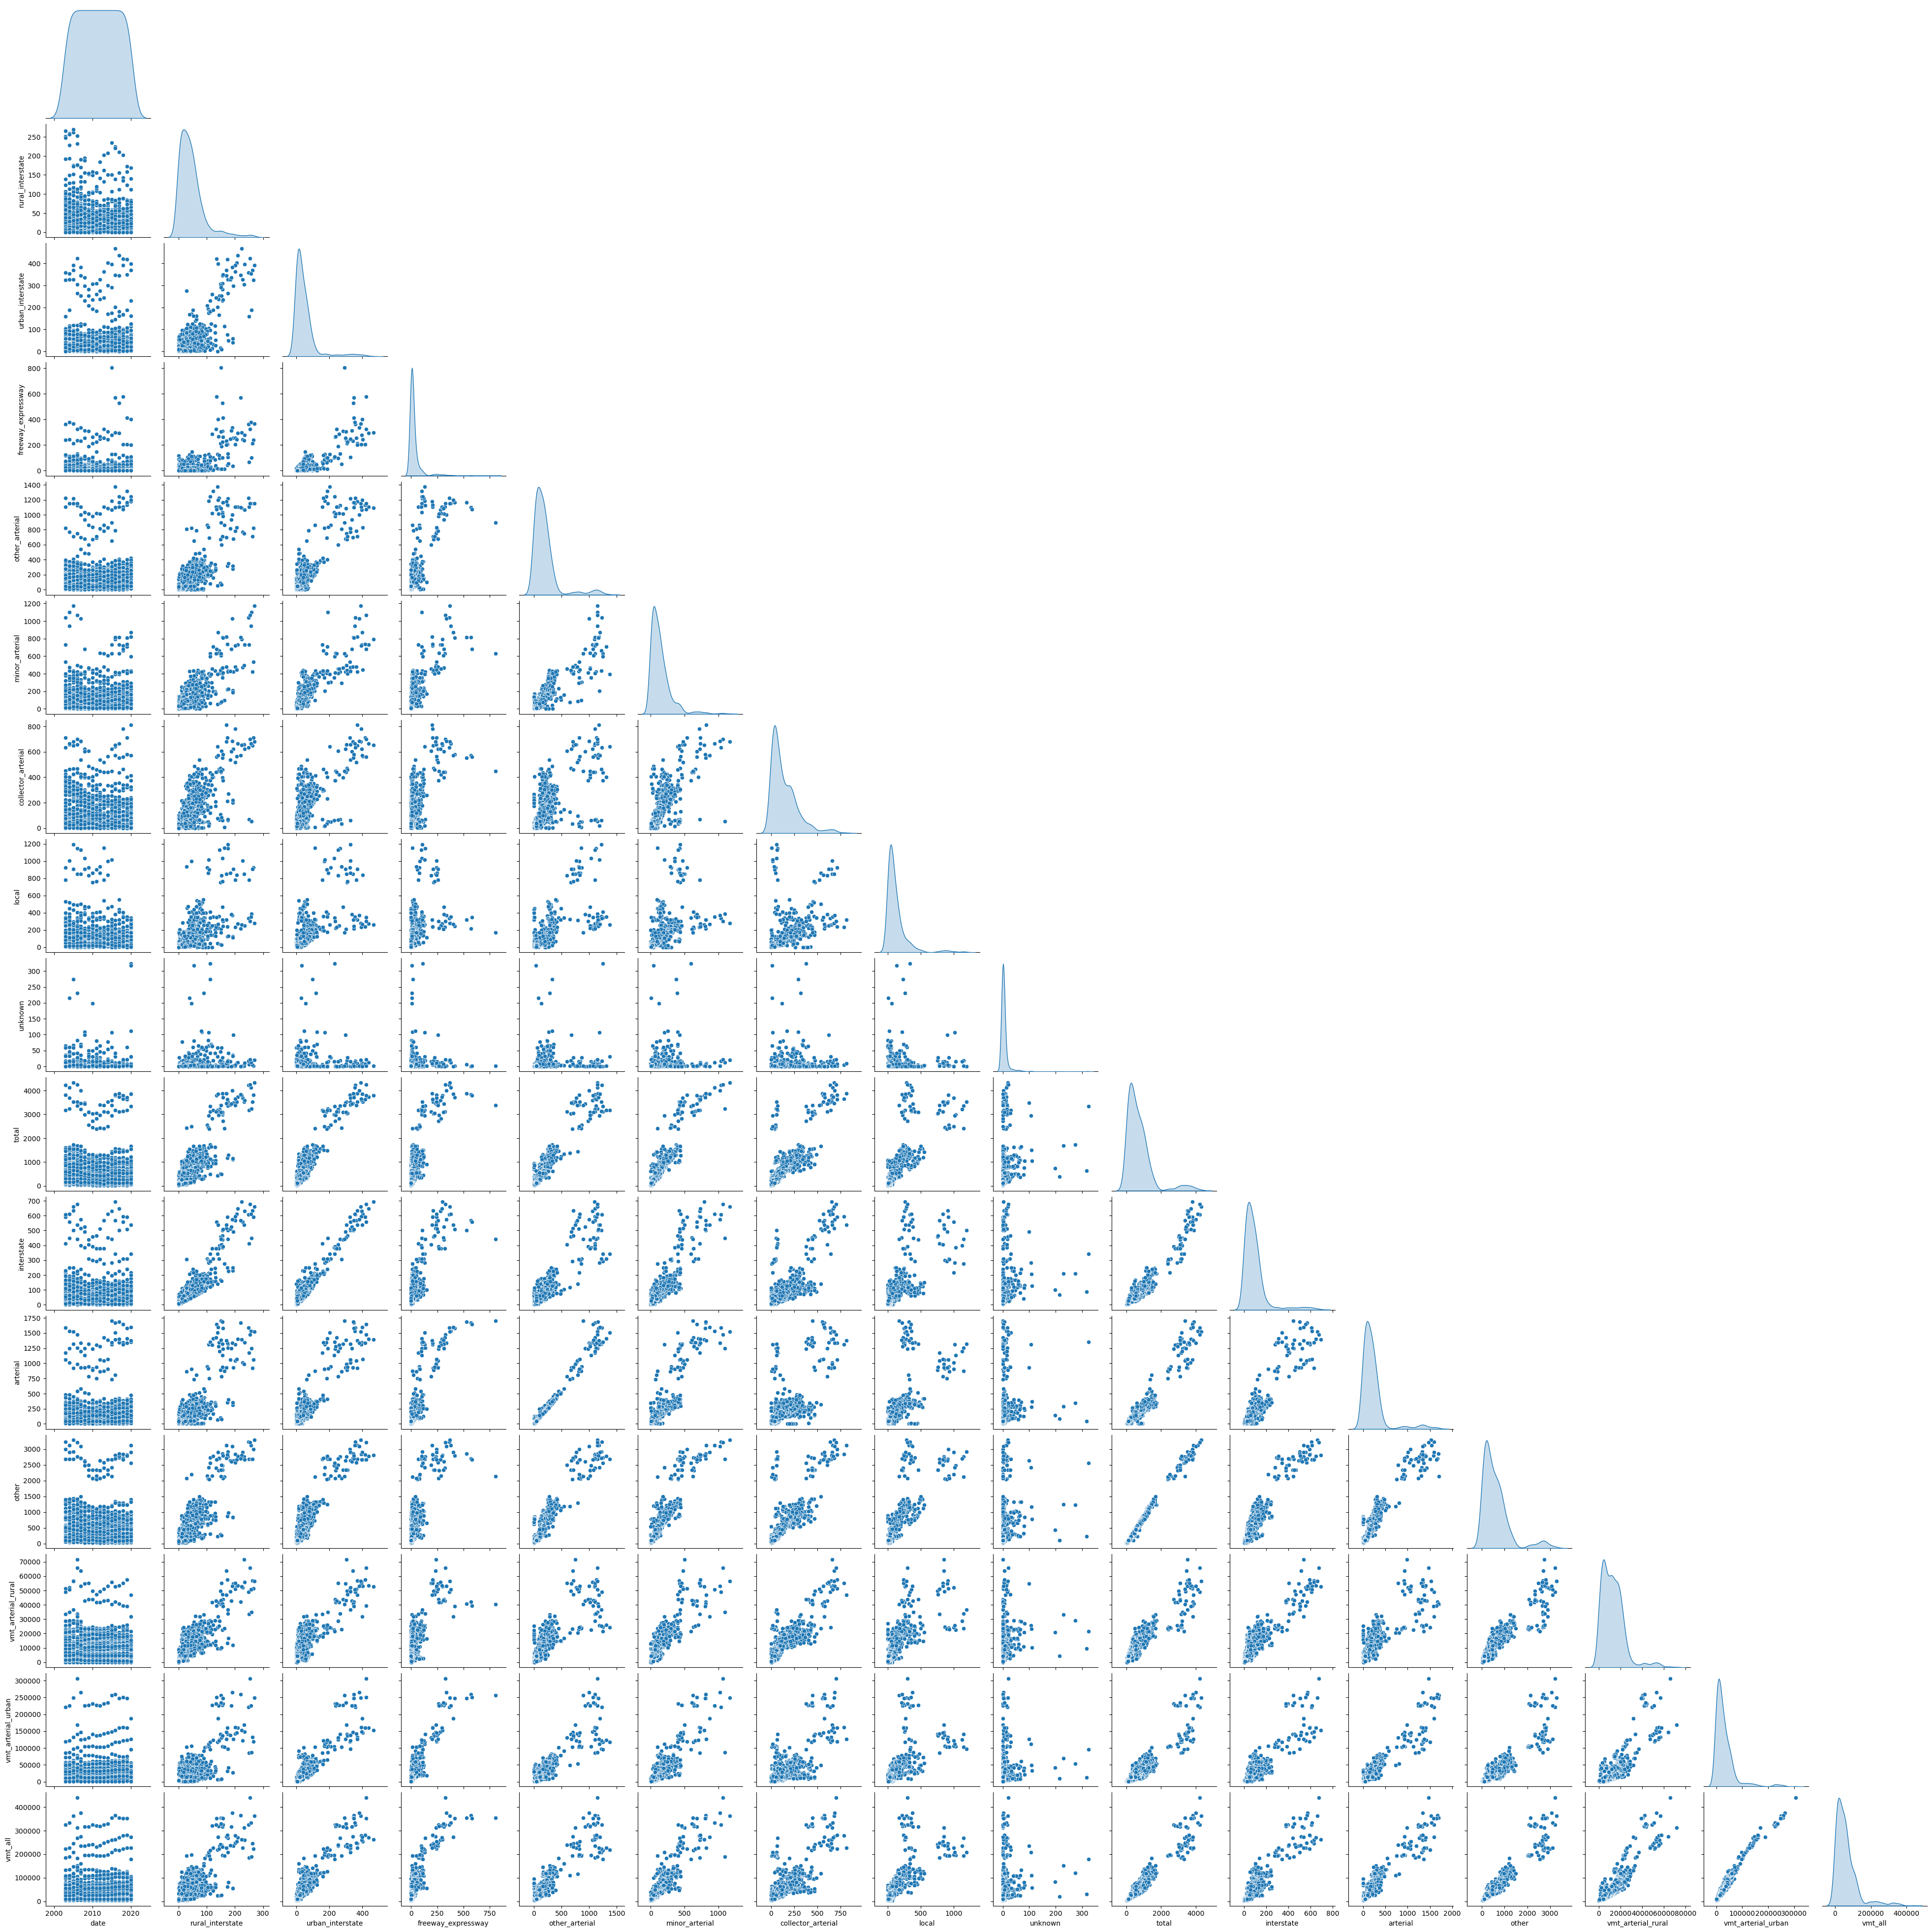

In [246]:
sns.pairplot(pair_plot_df,diag_kind="kde", corner=True)

In [ ]:
# fit model to X and Y variables (you will need to make more cells)

In [268]:
#grab the x&y values to fit from the df, reshape to 2d matrix
x1_matrix=pair_plot_df['vmt_all'].values.reshape(-1,1)
y1_matrix=pair_plot_df['total'].values.reshape(-1,1)
y1=pair_plot_df['total']
x1=pair_plot_df['vmt_all']

In [255]:
reg1=LinearRegression()

In [263]:
x_1=sm.add_constant(pair_plot_df['vmt_all'])

In [264]:
results=sm.OLS(y1,x_1).fit()

In [265]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     9480.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:26:42   Log-Likelihood:                -6294.5
No. Observations:                 918   AIC:                         1.259e+04
Df Residuals:                     916   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6157     10.492      2.632      0.009       7.024      48.207
vmt_all        0.0116      0.000     97.367      0.000       0.011       0.012
==============================================================================
Omnibus:                      170.448   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1080.336
Skew:                           0.679   Prob(JB):                    2.56e-235
Kurtosis:                       8.138   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'fatalities')

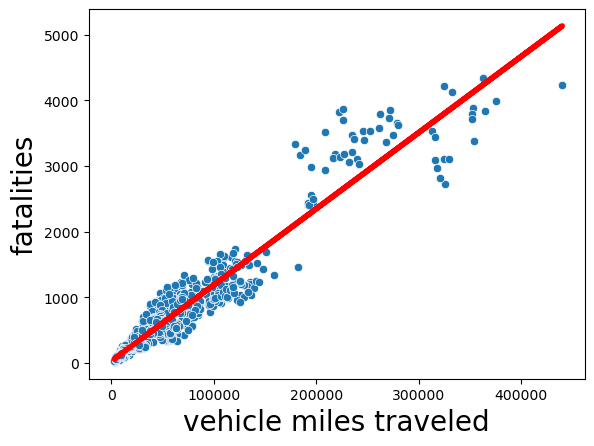

In [271]:
sns.scatterplot(x1,y1)
yhat = 0.0116*x_1+27.6157
fig= plt.plot(x_1,yhat, lw=4, c='red', label='regression line')
plt.xlabel('vehicle miles traveled', fontsize = 20)
plt.ylabel('fatalities', fontsize=20)

<AxesSubplot:xlabel='vmt_all', ylabel='total'>

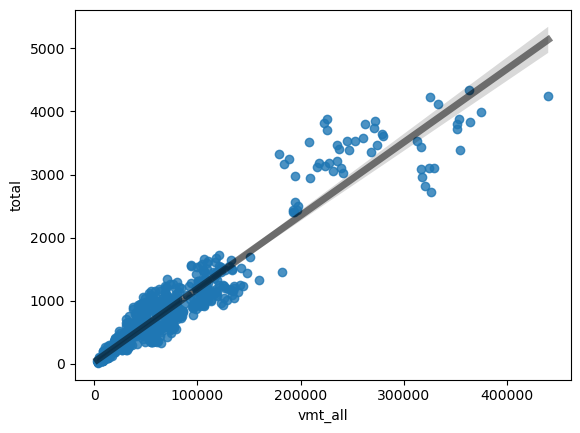

In [272]:
sns.regplot(x=pair_plot_df['vmt_all'], y=pair_plot_df['total'], line_kws={'color':'black','alpha':.5,'lw':5})

<AxesSubplot:>

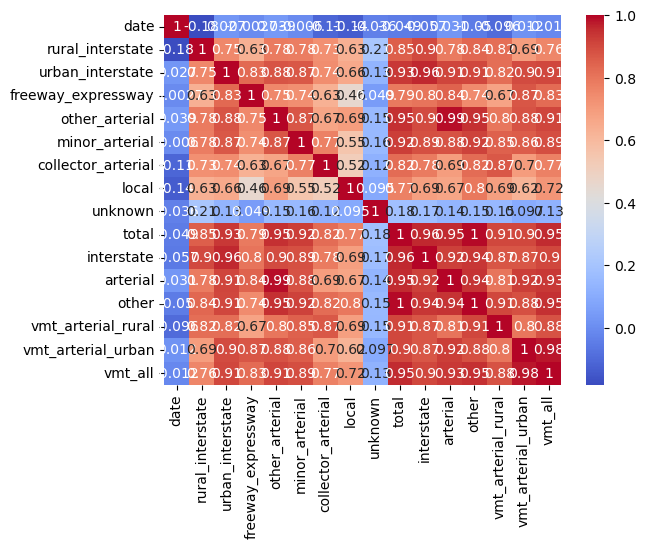

In [247]:
sns.heatmap(pair_plot_df.corr(),cmap='coolwarm',annot=True)

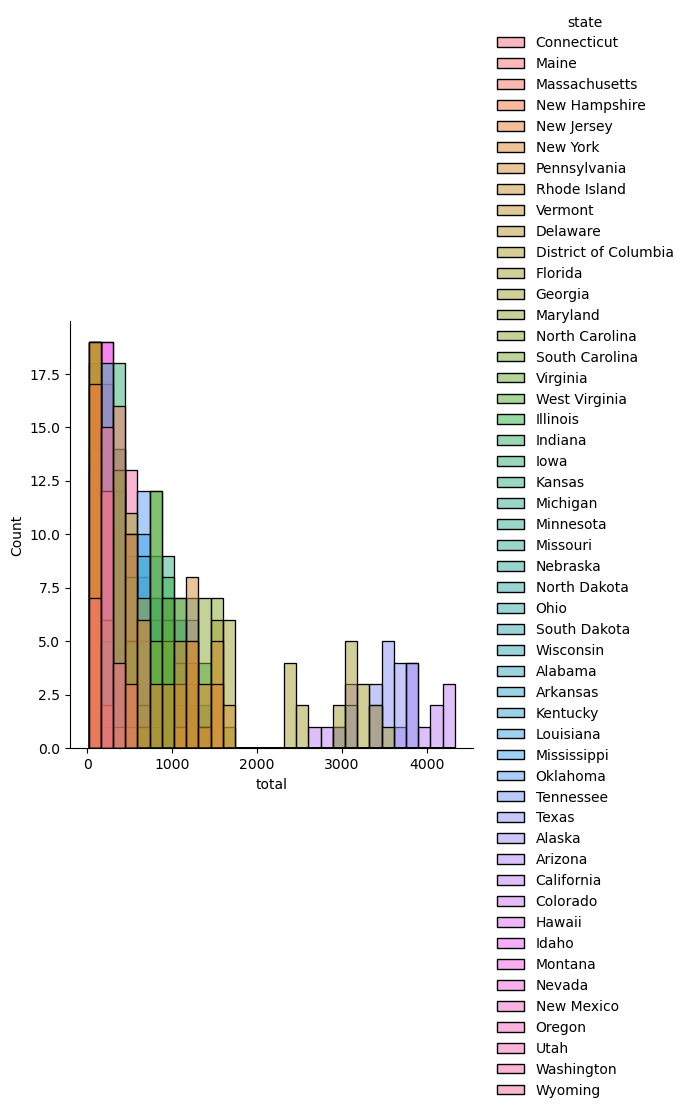

In [165]:
sns.displot(data=pair_plot_df,x='total',hue='state')

In [176]:
[pair_plot_df.total.describe()]

[count     969.00000
 mean      738.06192
 std       779.40353
 min        15.00000
 25%       229.00000
 50%       542.00000
 75%       953.00000
 max      4333.00000
 Name: total, dtype: float64]

In [186]:
pd.set_option('display.max_rows', 200)
pair_plot_df[pair_plot_df['total']>1000].head(200)

date           state  rural_interstate  urban_interstate  \
95   2002        New York              62.0              56.0   
96   2003        New York              39.0              56.0   
97   2004        New York              51.0              51.0   
98   2005        New York              46.0              54.0   
99   2006        New York              93.0              43.0   
100  2007        New York              89.0              13.0   
101  2008        New York              74.0              19.0   
102  2009        New York              59.0              14.0   
103  2010        New York              82.0              13.0   
104  2011        New York              54.0              58.0   
105  2012        New York              45.0              31.0   
106  2013        New York              65.0              13.0   
107  2014        New York              30.0              43.0   
108  2015        New York              34.0              49.0   
109  2016        New York              55.0              36.0   
110  2017        New York              54.0              22.0   
113  2020        New York              14.0              79.0   
114  2002    Pennsylvania              69.0              59.0   
115  2003    Pennsylvania              92.0              58.0   
116  2004    Pennsylvania              55.0              65.0   
117  2005    Pennsylvania              81.0              51.0   
118  2006    Pennsylvania              60.0              63.0   
119  2007    Pennsylvania              76.0              85.0   
120  2008    Pennsylvania              90.0              64.0   
121  2009    Pennsylvania              38.0              56.0   
122  2010    Pennsylvania              54.0              74.0   
123  2011    Pennsylvania              56.0              81.0   
124  2012    Pennsylvania              61.0              64.0   
125  2013    Pennsylvania              66.0              52.0   
126  2014    Pennsylvania              48.0              69.0   
127  2015    Pennsylvania              51.0              70.0   
128  2016    Pennsylvania              77.0              50.0   
129  2017    Pennsylvania              80.0              46.0   
130  2018    Pennsylvania              45.0              66.0   
131  2019    Pennsylvania              56.0              43.0   
132  2020    Pennsylvania              56.0              60.0   
209  2002         Florida             237.0             201.0   
210  2003         Florida             251.0             159.0   
211  2004         Florida             259.0             189.0   
212  2005         Florida             175.0             327.0   
213  2006         Florida             175.0             265.0   
214  2007         Florida             146.0             253.0   
215  2008         Florida             156.0             230.0   
216  2009         Florida             101.0             209.0   
217  2010         Florida             106.0             192.0   
218  2011         Florida             108.0             184.0   
219  2012         Florida              29.0             275.0   
220  2013         Florida             162.0             113.0   
221  2014         Florida              46.0             171.0   
222  2015         Florida             107.0             174.0   
223  2016         Florida             139.0             202.0   
224  2017         Florida             112.0             182.0   
225  2018         Florida             143.0             165.0   
226  2019         Florida             123.0             187.0   
227  2020         Florida             112.0             231.0   
228  2002         Georgia             131.0             100.0   
229  2003         Georgia             107.0             106.0   
230  2004         Georgia             129.0             117.0   
231  2005         Georgia             113.0              97.0   
232  2006         Georgia              90.0             119.0   
233  2007         Georgia             11

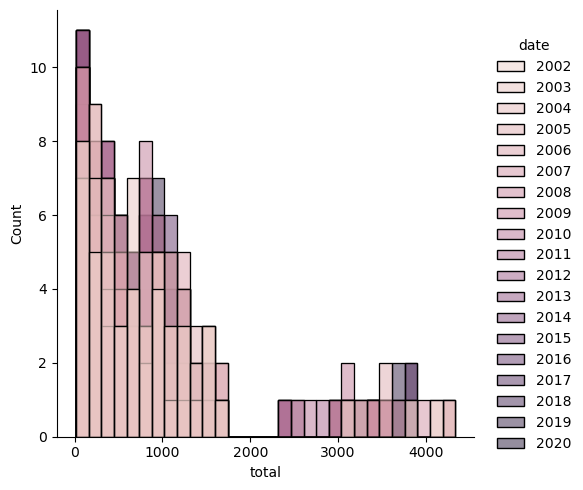

In [168]:
sns.displot(data=pair_plot_df,x='total',hue='date')

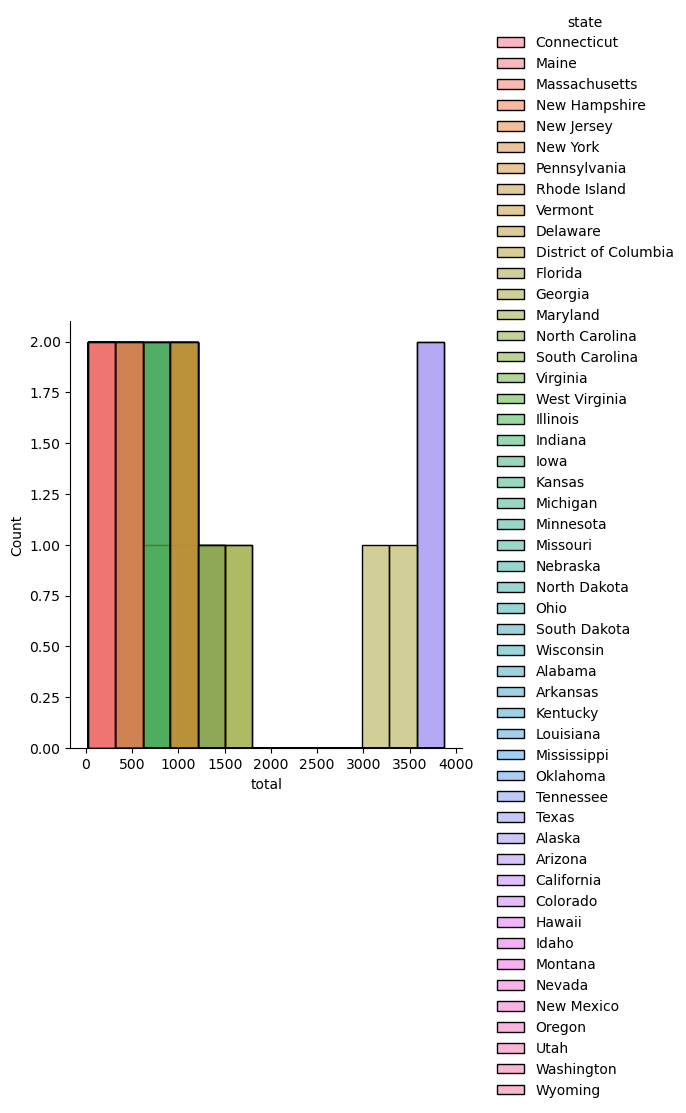

In [170]:
sns.displot(data=pair_plot_df[pair_plot_df['date']>2018],x='total',hue='state')

In [273]:
state_dict['Maine']

Unnamed: 0  vmt_arterial_rural  vmt_arterial_urban  vmt_all
date                                                             
2002           1               486.0               232.0   1157.0
2003        6285              6283.0              2842.0  14795.0
2004        9039              6341.0              2849.0  14923.0
2005       21127              6790.0              3030.0  16086.0
2006       37144              8065.0              3587.0  19292.0
2007       42650              6906.0              3174.0  16911.0
2008       44994              5748.0              2664.0  14151.0
2009       52338              5821.0              2674.0  14497.0
2010       59682              6050.0              2658.0  14781.0
2011       67026              5726.0              2606.0  14311.0
2012       74370              5753.0              2624.0  14199.0
2013       81714              5816.0              2580.0  14108.0
2014       89058              5854.0              2560.0  14098.0
2015       96402              5990.0              2576.0  14417.0
2016      103746              6132.0              2699.0  15004.0
2017      111090              6108.0              2734.0  15058.0
2018      118434              5574.0              3178.0  14766.0
2019      125778              5674.0              3120.0  14733.0
2020      121748              4373.0              2364.0  11570.0

In [274]:
fatalities_state_dict['Maine'].merge(state_dict['Maine'], on='date')

state  rural_interstate  urban_interstate  freeway_expressway  \
date                                                                  
2002  Maine              14.0               3.0                 3.0   
2003  Maine              15.0               0.0                 0.0   
2004  Maine              14.0               4.0                 3.0   
2005  Maine              20.0               1.0                 0.0   
2006  Maine               9.0               6.0                 2.0   
2007  Maine              15.0               0.0                 3.0   
2008  Maine              10.0               1.0                 0.0   
2009  Maine              10.0               0.0                 0.0   
2010  Maine              10.0               0.0                 0.0   
2011  Maine               4.0               0.0                 0.0   
2012  Maine               3.0               0.0                 0.0   
2013  Maine               7.0               1.0                 0.0   
2014  Maine               3.0               1.0                 0.0   
2015  Maine               5.0               0.0                 2.0   
2016  Maine               3.0               0.0                 2.0   
2017  Maine               7.0               6.0                 1.0   
2018  Maine               7.0               3.0                 1.0   
2019  Maine              11.0               3.0                 0.0   
2020  Maine               8.0               4.0                 0.0   

      other_arterial  minor_arterial  collector_arterial  local  unknown  \
date                                                                       
2002            35.0            33.0                64.0   57.0      7.0   
2003            59.0            36.0                52.0   43.0      2.0   
2004            48.0            30.0                60.0   35.0      0.0   
2005            38.0            19.0                63.0   27.0      1.0   
2006            25.0            33.0                77.0   34.0      2.0   
2007            39.0            37.0                53.0   36.0      0.0   
2008            27.0            42.0                46.0   29.0      0.0   
2009            33.0            45.0                35.0   36.0      0.0   
2010            15.0            29.0                60.0   45.0      2.0   
2011            12.0            50.0                 5.0   65.0      0.0   
2012            25.0            57.0                 0.0   79.0      0.0   
2013            22.0            37.0                 3.0   74.0      0.0   
2014            37.0            32.0                32.0   21.0      5.0   
2015            39.0            27.0                53.0   30.0      0.0   
2016            44.0            34.0                38.0   36.0      3.0   
2017            42.0            36.0                52.0   27.0      2.0   
2018            27.0            20.0                53.0   25.0      0.0   
2019            28.0            30.0                52.0   33.0      0.0   
2020            25.0            32.0                66.0   28.0      1.0   

      total  ...  arterial  other  Unnamed: 0_x  vmt_arterial_rural_x  \
date         ...                                                        
2002  216.0  ...      38.0  189.0             1                 486.0   
2003  207.0  ...      59.0  190.0          6285                6283.0   
2004  194.0  ...      51.0  173.0          9039                6341.0   
2005  169.0  ...      38.0  147.0         21127                6790.0   
2006  188.0  ...      27.0  169.0         37144                8065.0   
2007  183.0  ...      42.0  165.0         42650                6906.0   
2008  155.0  ...      27.0  144.0         44994                5748.0   
2009  159.0  ...      33.0  149.0         52338                5821.0   
2010  161.0  ...      15.0  149.0         59682                6050.0   
2011  136.0  ...      12.0  132.0         67026                5726.0   
2012  164.0  ...      25.0  161.0        

In [390]:
group1 = pair_plot_df[ pair_plot_df['date']==2020]
group2 = pair_plot_df[ pair_plot_df['date']<2020]

#perform independent two sample t-test
ttest_ind(group1['fatalities_per_vmt'], group2['fatalities_per_vmt'])

# Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.017969284594810425)

Ttest_indResult(statistic=4.621660521684533, pvalue=4.352434073615796e-06)

In [275]:
seasonal=pd.read_csv('seasonal.csv',index_col=0)

<AxesSubplot:>

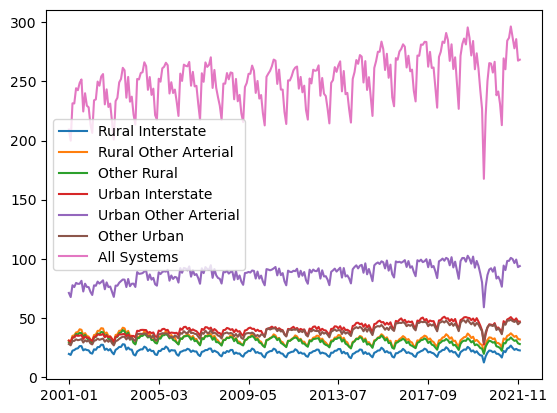

In [386]:
seasonal.plot.line()

In [385]:
seasonal.info

<bound method DataFrame.info of          Rural Interstate  Rural Other Arterial  Other Rural  \
2001-01         19.426042             30.739645    29.494584   
2001-02         18.586970             29.579354    28.190880   
2001-03         22.181398             34.728551    33.219088   
2001-04         22.698817             35.135015    33.574669   
2001-05         23.852469             37.626077    36.292352   
2001-06         24.164999             37.947002    35.907554   
2001-07         26.077308             40.296282    37.263217   
2001-08         26.035711             39.848409    37.042803   
2001-09         22.438926             35.254515    33.485096   
2001-10         23.374640             37.046334    35.467917   
2001-11         22.730097             34.695851    32.610467   
2001-12         22.456626             34.047967    31.565386   
2002-01         20.250475             31.501555    30.223053   
2002-02         19.687259             30.781490    28.955739   
2002-03 

In [277]:
fatalities=pd.read_csv('fatalities_df_final.csv',index_col=0)

<AxesSubplot:>

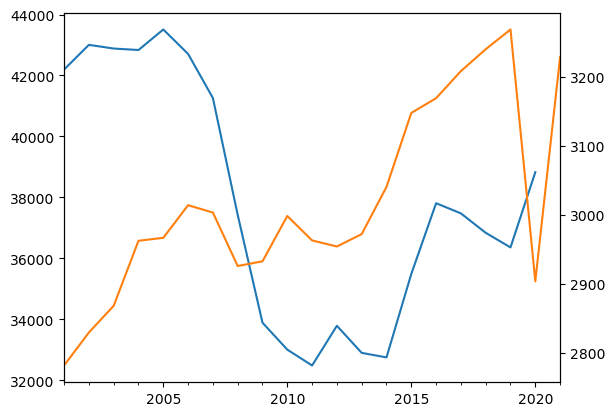

In [278]:

final_frame['total_death'].plot.line()
final_frame['all'].plot.line(secondary_y=True)

In [281]:
final_frame.info

<bound method DataFrame.info of                     all     arterial       other  interstate  \
2001-12-31  2781.462000  1340.670990  766.877009  673.914001   
2002-12-31  2829.336054  1360.241176  775.964694  693.130184   
2003-12-31  2868.108661  1372.741014  795.805122  699.562525   
2004-12-31  2962.400000  1429.900000  811.100000  721.300000   
2005-12-31  2966.700000  1434.000000  809.600000  722.900000   
2006-12-31  3014.000000  1454.400000  824.400000  735.300000   
2007-12-31  3003.400000  1450.500000  820.700000  731.900000   
2008-12-31  2925.800000  1412.900000  799.000000  713.700000   
2009-12-31  2932.600000  1415.700000  798.500000  718.500000   
2010-12-31  2998.400000  1434.200000  838.200000  726.500000   
2011-12-31  2962.900000  1416.900000  825.600000  720.300000   
2012-12-31  2954.100000  1419.700000  809.100000  725.200000   
2013-12-31  2972.100000  1425.900000  813.300000  732.800000   
2014-12-31  3040.600000  1449.700000  834.000000  757.000000   
2015-12-

In [330]:
y=[final_frame['total_death'].loc['2019-12-31'],11.6*final_frame['all'].loc['2020-12-31']]
x=[final_frame['all'].loc['2019-12-31'],final_frame['all'].loc['2020-12-31']]
x=pd.to_datetime(['2019-12-31','2020-12-31'])

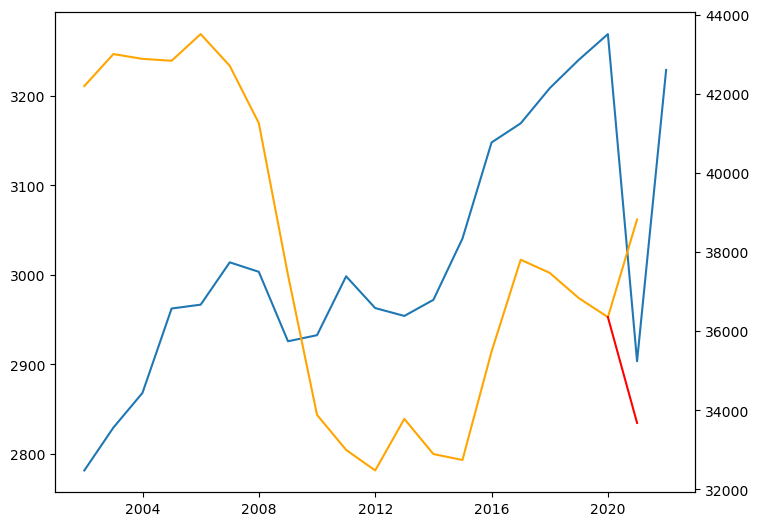

In [332]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(final_frame['all'])
ax2=ax.twinx()
ax2.plot(final_frame['total_death'],color='orange')
ax2.plot(x,y,color='red')
# # plt.plot(x,y,color='red',secondary_y=True)

In [339]:
pair_plot_df['fatalities_per_vmt']=pair_plot_df['total']/pair_plot_df['vmt_all']

In [340]:
pair_plot_df[pair_plot_df['date']>2019]['fatalities_per_vmt']

18     0.012441
37     0.014175
56     0.006919
75     0.009657
94     0.010243
113    0.010959
132    0.014099
151    0.011091
170    0.011378
189    0.014428
208    0.012375
227    0.018562
246    0.015715
265    0.012194
284    0.015473
303    0.022486
322    0.012925
341    0.017728
360    0.014243
379    0.013614
398    0.012040
417    0.016093
436    0.013891
455    0.008342
474    0.016010
493    0.013331
512    0.012588
531    0.013446
550    0.017279
569    0.011687
588    0.015811
607    0.020424
626    0.019316
645    0.020650
664    0.022435
683    0.017105
702    0.017626
721    0.017155
740    0.014522
759    0.018672
778    0.014141
797    0.014402
816    0.011230
835    0.014279
854    0.019117
873    0.014342
892    0.017826
911    0.016937
930    0.010298
949    0.011415
968    0.014105
Name: fatalities_per_vmt, dtype: float64

<AxesSubplot:xlabel='fatalities_per_vmt', ylabel='Count'>

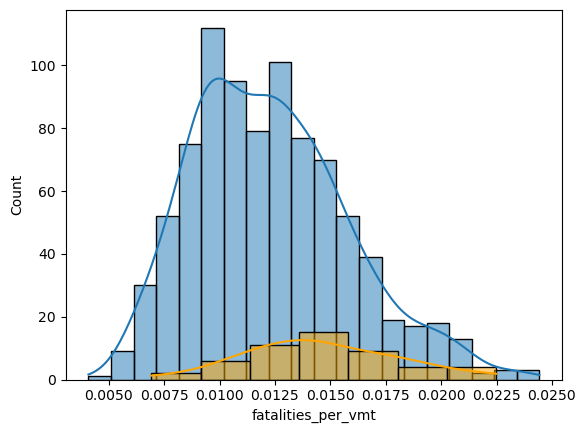

In [346]:
sns.histplot(data=pair_plot_df[pair_plot_df['date']<2020],x='fatalities_per_vmt',kde=True)
sns.histplot(data=pair_plot_df[pair_plot_df['date']==2020],x='fatalities_per_vmt',color = 'orange',kde=True)

In [363]:
# ['pandemic_year' if pair_plot_df[pair_plot_df['date']==2020] else 'normal_year']
pair_plot_df[pair_plot_df['date']==2020]

date                 state  rural_interstate  urban_interstate  \
18   2020           Connecticut               5.0              43.0   
37   2020                 Maine               8.0               4.0   
56   2020         Massachusetts               3.0              57.0   
75   2020         New Hampshire               0.0               1.0   
94   2020            New Jersey               6.0              57.0   
113  2020              New York              14.0              79.0   
132  2020          Pennsylvania              56.0              60.0   
151  2020          Rhode Island               4.0              10.0   
170  2020               Vermont               4.0               1.0   
189  2020              Delaware               1.0              12.0   
208  2020  District of Columbia               0.0               3.0   
227  2020               Florida             112.0             231.0   
246  2020               Georgia              53.0             162.0   
265  2020              Maryland               4.0              54.0   
284  2020        North Carolina              39.0             115.0   
303  2020        South Carolina              83.0              34.0   
322  2020              Virginia              65.0              73.0   
341  2020         West Virginia              10.0              17.0   
360  2020              Illinois              50.0             126.0   
379  2020               Indiana              57.0              44.0   
398  2020                  Iowa              23.0              14.0   
417  2020                Kansas              24.0              23.0   
436  2020              Michigan              27.0              81.0   
455  2020             Minnesota              14.0              21.0   
474  2020              Missouri              36.0              97.0   
493  2020              Nebraska              23.0               9.0   
512  2020          North Dakota              10.0               1.0   
531  2020                  Ohio              31.0             123.0   
550  2020          South Dakota              15.0               5.0   
569  2020             Wisconsin              24.0              16.0   
588  2020               Alabama              44.0              76.0   
607  2020              Arkansas              54.0              33.0   
626  2020              Kentucky              54.0              43.0   
645  2020             Louisiana              41.0              72.0   
664  2020           Mississippi              57.0              36.0   
683  2020              Oklahoma              48.0              62.0   
702  2020             Tennessee              75.0             125.0   
721  2020                 Texas             169.0             370.0   
740  2020                Alaska              16.0               8.0   
759  2020               Arizona              80.0              48.0   
778  2020            California             140.0             399.0   
797  2020              Colorado              27.0              60.0   
816  2020                Hawaii               0.0               9.0   
835  2020                 Idaho              21.0               5.0   
854  2020               Montana              36.0               3.0   
873  2020                Nevada              21.0              28.0   
892  2020            New Mexico              56.0              37.0   
911  2020                Oregon              13.0              25.0   
930  2020                  Utah              28.0              19.0   
949  2020            Washington              17.0              42.0   
968  2020               Wyoming              23.0               5.0   

     freeway_expressway  other_arterial  minor_arterial  collector_arterial  \
18                 34.0            59.0            98.0                33.0   
37                  0.0            25.0            32.0                66.0   
56                 14.0           107.0            97.0                36.0

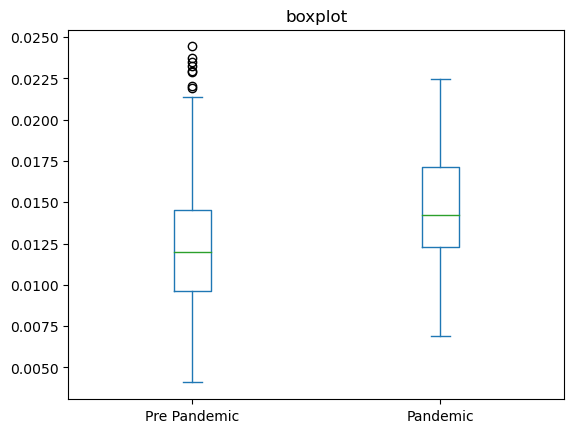

In [374]:
data_plot =pd.DataFrame({"Pre Pandemic": pair_plot_df[pair_plot_df['date']<2020]['fatalities_per_vmt'], "Pandemic": pair_plot_df[pair_plot_df['date']==2020]['fatalities_per_vmt']})
ax = data_plot[['Pre Pandemic', 'Pandemic']].plot(kind='box', title='boxplot')
# plt.show()

In [375]:
pair_plot_df['percentage_arterial']=(pair_plot_df['vmt_arterial_rural']+pair_plot_df['vmt_arterial_urban'])/pair_plot_df['vmt_all']

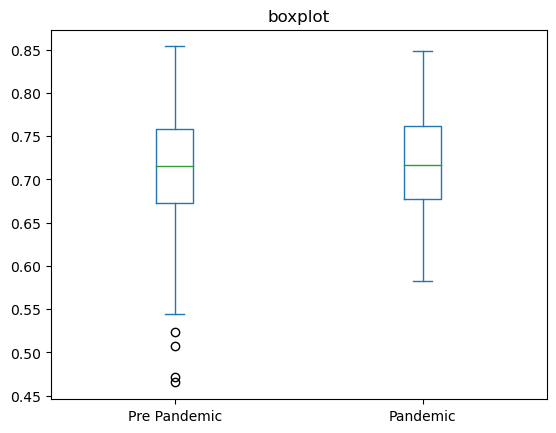

In [376]:
data_plot =pd.DataFrame({"Pre Pandemic": pair_plot_df[pair_plot_df['date']<2020]['percentage_arterial'], "Pandemic": pair_plot_df[pair_plot_df['date']==2020]['percentage_arterial']})
ax = data_plot[['Pre Pandemic', 'Pandemic']].plot(kind='box', title='boxplot')
# plt.show()

<AxesSubplot:xlabel='percentage_arterial', ylabel='Count'>

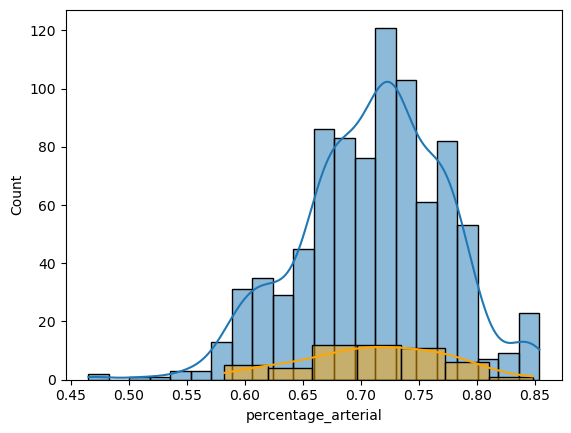

In [378]:
sns.histplot(data=pair_plot_df[pair_plot_df['date']<2020],x='percentage_arterial',kde=True)
sns.histplot(data=pair_plot_df[pair_plot_df['date']==2020],x='percentage_arterial',color = 'orange',kde=True)

In [391]:
group1 = pair_plot_df[ pair_plot_df['date']==2020]
group2 = pair_plot_df[ pair_plot_df['date']<2020]

#perform independent two sample t-test
ttest_ind(group1['percentage_arterial'], group2['percentage_arterial'])

# Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.017969284594810425)

Ttest_indResult(statistic=0.11380445233586924, pvalue=0.9094177469937057)

In [382]:
pair_plot_df['percentage_urban']=pair_plot_df['vmt_arterial_urban']/(pair_plot_df['vmt_arterial_urban']+pair_plot_df['vmt_arterial_rural'])

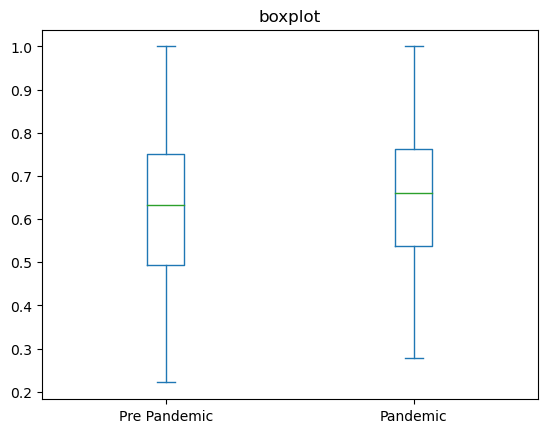

In [383]:
data_plot =pd.DataFrame({"Pre Pandemic": pair_plot_df[pair_plot_df['date']<2020]['percentage_urban'], "Pandemic": pair_plot_df[pair_plot_df['date']==2020]['percentage_urban']})
ax = data_plot[['Pre Pandemic', 'Pandemic']].plot(kind='box', title='boxplot')
# plt.show()

<AxesSubplot:xlabel='percentage_urban', ylabel='Count'>

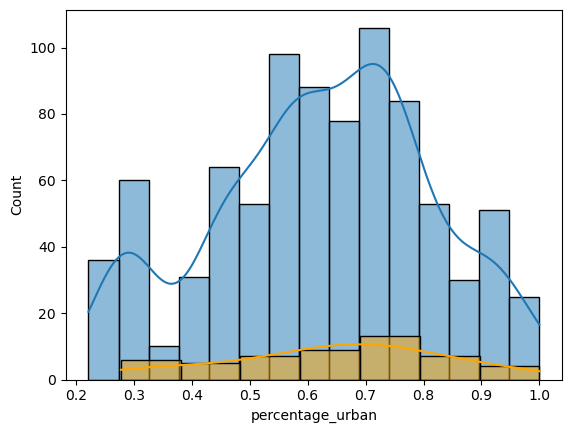

In [384]:
sns.histplot(data=pair_plot_df[pair_plot_df['date']<2020],x='percentage_urban',kde=True)
sns.histplot(data=pair_plot_df[pair_plot_df['date']==2020],x='percentage_urban',color = 'orange',kde=True)

In [393]:
group1 = pair_plot_df[ pair_plot_df['date']==2020]
group2 = pair_plot_df[ pair_plot_df['date']<2020]

#perform independent two sample t-test
ttest_ind(group1['percentage_urban'], group2['percentage_urban'])

# Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.017969284594810425)

Ttest_indResult(statistic=0.8613437558737382, pvalue=0.38927415540774746)

In [ ]:
state_list=fatalities.state.unique()

In [ ]:
fatalities_state_dict={}
for name in state_list:
    fatalities_state_dict[name]=fatalities[fatalities['state']==name].sort_values('year').set_index('year')


In [ ]:
pair_plot_df

In [ ]:
fatalities_state_dict['Maine']

In [ ]:
state_key="Maine"

In [ ]:
#pruning 3 interesting 
fatalities_state_dict['Maine'][['state','total','year']]

In [ ]:
sns.pairplot(pair_plot_df)

In [ ]:
sns.heatmap(pair_plot_df.corr(),cmap='coolwarm',annot=True)